## BUSINESS UNDERSTANDING
### Overview
To expand its market footprint and diversify its investment portfolio, a company is preparing to enter the aviation sector. This initiative involves acquiring aircrafts to operate within both commercial and private aviation markets. Given the significant risks associated with air travel-ranging from mechanical failure and environmental hazards to pilot error and maintenance practices- it is imperative that the company make data-informed decisions regarding aircraft selection.

### Business Problem
The organization currently lacks knowledge about the risk profiles of different aircraft models. Without a clear understanding of historical accident patterns, the company could unknowingly invest in aircraft with poor safety records, resulting in potential financial loss, reputational damage, and regulatory complications. Therefore, leadership has tasked the data team (a.k.a. me) with identifying the **lowest-risk aircraft models** to guide strategic procurement.

### Project Objective
The objective of this project is to analyze historical aviation accident data to evaluate and compare the safety performance of different aircraft models. The goal is to translate this analysis into **three clear business recommendations** that will inform the Aviation Division’s purchasing decisions.

This involves:
- Identifying aircraft models with consistently low accident frequencies or severities.
- Understanding trends across aircraft manufacturers, types, and use cases (commercial vs. private).
- Assessing the impact of contributing factors such as pilot error, equipment failure, weather conditions, or operational mismanagement.

### Business Goals
- **Minimize Risk**: Recommend aircraft with the lowest historical accident rates to reduce the risk exposure for the business.
- **Support Procurement**: Provide a ranked list or categorical insights on safe aircraft for commercial and private deployment.
- **Enable Strategic Planning**: Use historical data trends to anticipate long-term implications of choosing particular aircraft.

### Success Criteria
- Delivery of **three actionable and evidence-based business recommendations** supported by visual insights.
- Development of an **interactive dashboard** that allows business stakeholders to explore aircraft risk profiles.
- A **non-technical presentation** and a **well-documented Jupyter Notebook** that together communicate the methodology, findings, and value of the analysis.

## INITIAL DATA EXPLORATION (IDE)

Every dataset tells a story—but before I dive into any narratives, I'll flip through the table of contents. This phase is about getting comfortable with the data: seeing what’s there, what’s missing, and what might surprise me later if I don’t pay attention now.

#### What I’m doing:
- Importing key libraries like 'pandas', 'numpy', 'seaborn', 'matplotlib', and 'plotly'— the usual suspects for slicing, dicing and visualizing data.
- Previewing the first few rows to get a feel for the dataset’s structure, naming conventions, and early red flags (no one likes nasty surprises 30 cells in).
- Checking the shape of the data because whether it's 500 rows or 50,000 completely changes the game.

This might not be the flashiest part of the workflow, but it’s where trust is built—between me and the dataset. And as I’ve learned from previous projects, a few extra minutes spent here can save hours of confusion down the road.

Exploration done right is part instinct, part structure—this is BOTH!

In [233]:
# ==================== [Import relevant libraries] ====================

# Mathematical computation and analysis libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import plotly.express as px

# Load the data
aviation_data = pd.read_csv(r'Data\AviationData.csv', encoding = 'ISO-8859-1')

aviation_data.head()

c:\Users\lenovo\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning:

Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.



Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...          Personal         NaN                  4.0   
2          NaN  ...          Personal         NaN                  3.0   
3          NaN  ...          Personal         NaN                  2.0   
4          NaN  ...          Personal         NaN                  1.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    0.0                  0.0             0.0   
1                    0.0                  0.0             0.0   
2                    NaN                  NaN             NaN   
3                    0.0                  0.0             0.0   
4                    2.0                  NaN             0.0   

  Weather.Condition  Broad.phase.of.flight   Report.Status Publication.Date  
0               UNK                 Cruise  Probable Cause              NaN  
1               UNK                Unknown  Probable Cause       19-09-1996  
2               IMC                 Cruise  Probable Cause       26-02-2007  
3               IMC                 Cruise  Probable Cause       12-09-2000  
4               VMC               Approach  Probable Cause       16-04-1980  

[5 rows x 31 columns]

In [234]:
# Find out how many rows and columns I am working with
print(f"The dataset contains {aviation_data.shape[0]} rows and {aviation_data.shape[1]} columns\n")

# Print column names to check for standardization/renaming needs
print("Column Names:\n", aviation_data.columns, "\n")

The dataset contains 88889 rows and 31 columns

Column Names:
 Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object') 



In [235]:
# Standardize columns for easier readability
aviation_data.columns = (aviation_data.columns.str.strip().str.lower().str.replace(".", "_"))

# Preview changes
aviation_data.sample(2) 

event_id investigation_type accident_number  event_date  \
8056   20001214X39232           Accident      CHI84LA164  1984-04-26   
70573  20110814X12005           Accident      WPR11LA380  2011-08-14   

          location        country latitude longitude airport_code  \
8056   BLOOMER, WI  United States      NaN       NaN          NaN   
70573  Lemoore, CA  United States  361723N  1195615W          NLC   

                    airport_name  ... purpose_of_flight air_carrier  \
8056                         NaN  ...          Personal         NaN   
70573  Lemoore Naval Air Station  ...          Personal         NaN   

      total_fatal_injuries total_serious_injuries total_minor_injuries  \
8056                   0.0                    0.0                  2.0   
70573                  0.0                    0.0                  0.0   

      total_uninjured weather_condition  broad_phase_of_flight  \
8056              0.0               VMC                 Cruise   
70573             3.0               VMC                    NaN   

                                           report_status publication_date  
8056                                      Probable Cause              NaN  
70573  A loss of engine power during cruise flight du...       25-09-2020  

[2 rows x 31 columns]

In [236]:
# Get metadata information
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88889 non-null  object 
 1   investigation_type      88889 non-null  object 
 2   accident_number         88889 non-null  object 
 3   event_date              88889 non-null  object 
 4   location                88837 non-null  object 
 5   country                 88663 non-null  object 
 6   latitude                34382 non-null  object 
 7   longitude               34373 non-null  object 
 8   airport_code            50249 non-null  object 
 9   airport_name            52790 non-null  object 
 10  injury_severity         87889 non-null  object 
 11  aircraft_damage         85695 non-null  object 
 12  aircraft_category       32287 non-null  object 
 13  registration_number     87572 non-null  object 
 14  make                    88826 non-null

In [237]:
# Getter a better view of all numeric variables
numeric_cols = aviation_data.select_dtypes(include = 'number')

for col in numeric_cols:
    print(col)

number_of_engines
total_fatal_injuries
total_serious_injuries
total_minor_injuries
total_uninjured


In [238]:
# Get a better view of all categorical variables
categorical_cols = aviation_data.select_dtypes(include = 'object')

for col in categorical_cols:
    print(col)


event_id
investigation_type
accident_number
event_date
location
country
latitude
longitude
airport_code
airport_name
injury_severity
aircraft_damage
aircraft_category
registration_number
make
model
amateur_built
engine_type
far_description
schedule
purpose_of_flight
air_carrier
weather_condition
broad_phase_of_flight
report_status
publication_date


In [239]:
aviation_data.describe()

number_of_engines  total_fatal_injuries  total_serious_injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       total_minor_injuries  total_uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

In [240]:
# Get basic statistical summary of all columns
aviation_data.describe(include = "O").T

count unique             top   freq
event_id               88889  87951  20001212X19172      3
investigation_type     88889      2        Accident  85015
accident_number        88889  88863      ERA22LA103      2
event_date             88889  14782      1984-06-30     25
location               88837  27758   ANCHORAGE, AK    434
country                88663    219   United States  82248
latitude               34382  25592         332739N     19
longitude              34373  27156        0112457W     24
airport_code           50249  10375            NONE   1488
airport_name           52790  24871         Private    240
injury_severity        87889    109       Non-Fatal  67357
aircraft_damage        85695      4     Substantial  64148
aircraft_category      32287     15        Airplane  27617
registration_number    87572  79105            NONE    344
make                   88826   8237          Cessna  22227
model                  88797  12318             152   2367
amateur_built          88787      2              No  80312
engine_type            81812     13   Reciprocating  69530
far_description        32023     31             091  18221
schedule               12582      3            NSCH   4474
purpose_of_flight      82697     26        Personal  49448
air_carrier            16648  13590           Pilot    258
weather_condition      84397      4             VMC  77303
broad_phase_of_flight  61724     12         Landing  15428
report_status          82508  17075  Probable Cause  61754
publication_date       75118   2924      25-09-2020  17019

In [241]:
# Check for duplicates
print("Duplicates:", aviation_data.duplicated().sum())

# Check for nulls and get their percentage to advice on best imputing or dropping criteria
null_counts = aviation_data.isna().sum()
null_percent = (null_counts / len(aviation_data)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null %': null_percent.round(2)})

print("\nNull Values Summary:\n", null_summary)

Duplicates: 0

Null Values Summary:
                         Null Count  Null %
event_id                         0    0.00
investigation_type               0    0.00
accident_number                  0    0.00
event_date                       0    0.00
location                        52    0.06
country                        226    0.25
latitude                     54507   61.32
longitude                    54516   61.33
airport_code                 38640   43.47
airport_name                 36099   40.61
injury_severity               1000    1.12
aircraft_damage               3194    3.59
aircraft_category            56602   63.68
registration_number           1317    1.48
make                            63    0.07
model                           92    0.10
amateur_built                  102    0.11
number_of_engines             6084    6.84
engine_type                   7077    7.96
far_description              56866   63.97
schedule                     76307   85.85
purpose_of_flight

## DATA UNDERSTANDING

### Data Source

The dataset used in this analysis is sourced from the **National Transportation Safety Board (NTSB)** and contains records of civil aviation accidents and selected incidents from **1962 to 2023**. The data covers both U.S.-based incidents and those that occurred in international waters involving U.S.-registered aircraft.

- **File Type**: CSV
- **Size**: Dataset has 88889 rows and 31 columns
- **Period Covered**: 1962–2023
- **Scope**: Includes variables on aircraft make/model, accident severity, causes, weather conditions, flight purpose, location, and fatalities/injuries.

### Data Structure

The following are the key columns I will consider for my business problem:

| Column Name           | Description                                                                                                                 |
|-----------------------|-----------------------------------------------------------------------------------------------------------------------------|
| make                  | Manufacturer of the aircraft                                                                                                |
| model                 | Model of the aircraft                                                                                                       |
| aircraft_damage       | Severity of aircraft damage (e.g., Destroyed, Substantial, Minor)                                                           |
| injury_severity       | Level of injury/fatalities (e.g., Fatal, Non-Fatal, None)                                                                   |
| purpose_of_flight     | Reason for flight (e.g., Personal, Business, Commercial, Instructional)                                                     |
| broad_phase_of_flight | Flight phase during which the incident occurred (e.g., Takeoff, Landing)                                                    |
| weather_condition     | Weather during the incident (e.g., VMC - Visual Meteorological Conditions)                                                  |
| engine_type           | The type of engine of the aircraft (e.g., Reciprocating, Turbo Fan, Turbo Jet, etc.)                                        |
| amateur_built         | Indicates whether the aircraft was amateur/home-built (Yes or No)                                                           |
| total_fatal_injuries  | Total number of individuals fatally injured in the accident, including passengers, crew, and possibly people on the ground. |
| number_of_engines     | Total number of engines installed on the aircraft involved in the accident.                                                 |
| country               | Country in which the incident occurred, used to distinguish between domestic and international operations.                  |

### Initial Observations

- **Duplicates**: Zero (0)
- **Missing/Null Values**: Missing data is prevalent across several columns- some like 'schedule' have 85% of it having missing values.
- The dataset is largely comprised of categorical variables with the exception of 'number_of_engines', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries' and 'total_uninjured' which are numeric variables. These may require normalisation.
- The dataset spans **over six decades**, making time-based trend analysis highly feasible.
- The columns **'make'** and **'model'** are critical for this analysis since they relate directly to the business question on **aircraft risk assessment**.

### Data Quality Issues

- **Missing Values**: Several fields contain nulls or blank strings. These must be investigated for relevance and either imputed, ignored, or used as-is depending on the column.
- **Inconsistent Labeling**: Categorical values such as 'aircraft_damage' or 'purpose_of_flight' may be inconsistent (e.g., "business" vs "Business") and will require standardization.
- **Outliers**: Check if outliers exist in fields like 'event_date', 'pubication_date', 'total_fatal_injuries' (among others) and must be handled with care. 

## Next Steps

- Perform data cleaning and preprocessing.
- Explore distributions of key fields.
- Diagnostic analysis, Descriptive analysis and Prescriptive analysis which will include uni-variate, bi-variate and multi-variate analysis. This will be done by creating visualisation and interpreting them.

## DATA CLEANING

Before any analysis can be trusted, the data needs to be clean, consistent, and structured for purpose. This phase is about building that foundation—quietly critical, often underrated, and essential for any meaningful insight.

#### Key Tasks:
- Impute missing data using context-appropriate methods—median for skewed numeric values, mode for categorical fields, or placeholders where necessary. Missingness is expected, but it shouldn’t disrupt the flow of analysis.
- Standardize entries that suffer from formatting inconsistencies. Whether it's spacing, capitalization, or multiple spellings of the same value, consistency helps prevent misinterpretation.
- Detect and handle outliers in relevant numeric columns. Some outliers are genuine, others are artifacts. The goal here is to investigate, not eliminate blindly.
- Feature engineering, to create new, more informative variables that capture underlying patterns—sometimes a small transformation makes a big difference.
- Archive unused columns to declutter the dataset and improve performance. Nothing is deleted—just placed in a quiet corner for now.
- Save both the cleaned and archived datasets to ensure version control, reproducibility, and traceability.

In short: this is the part where I do the quiet work that makes the later results believable. It may not get the spotlight—but it earns the trust of anyone paying attention.

In [242]:
# ==================== [1. make] ====================

# Find null count in 'make' column
print("Null Values in 'make':", aviation_data['make'].isna().sum())

# Get unique values in 'make' column
print("\nUnique values in 'make':\n", aviation_data['make'].unique())

# Standardize 'make' column fields
aviation_data['make'] = aviation_data['make'].str.strip().str.title()

# See the 15 most common aircraft makes
print("\nThe 15 Most Common Aircraft Makes are:\n", aviation_data['make'].value_counts().head(15))


Null Values in 'make': 63

Unique values in 'make':
 ['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']

The 15 Most Common Aircraft Makes are:
 Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Mooney                1334
Robinson              1230
Grumman               1172
Bellanca              1045
Hughes                 932
Schweizer              773
Air Tractor            691
Aeronca                636
Mcdonnell Douglas      608
Maule                  589
Name: make, dtype: int64


In [243]:
# ==================== [2. model] ====================

# Count null values in 'model'
print("\nNull Values in 'model':", aviation_data['model'].isna().sum())

# Display unique values in 'model'
print("\nUnique 'model':\n", aviation_data['model'].unique())

# Strip whitespace from entries in 'model'
aviation_data['model'] = aviation_data['model'].str.strip()

# Display top 15 most frequent aircraft models
print("\nTop 15 Aircraft Models:\n", aviation_data['model'].value_counts().head(15))



Null Values in 'model': 92

Unique 'model':
 ['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']

Top 15 Aircraft Models:
 152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
PA-18         581
PA-18-150     578
PA-28-180     572
PA-28-161     569
PA-28-181     532
Name: model, dtype: int64


## Aircraft Identifier Creation (Make + Model)

In this section, I focused on cleaning and engineering the 'make' and 'model' columns to create a unified aircraft identifier—crucial for tracking risk patterns tied to specific aircraft types.

#### Steps Taken:

**1. Null Handling**  
Rather than using mode imputation—which could unintentionally skew the data- I replaced missing values in both 'make' and 'model' with 'Not Reported'. This approach keeps the data transparent and avoids dropping potentially useful rows too early in the process.

**2. Standardization**  
To reduce inconsistency (and spare myself later headaches), I stripped leading and trailing spaces using '.str.strip()'. The 'make' column was formatted to title case (e.g 'CESSNA' becomes 'Cessna'), while 'model' was converted to uppercase ('172n' becomes '172N'). This small cleanup step goes a long way in making groupings reliable.

**3. Feature Engineering**  
Finally, I combined the cleaned 'make' and 'model' columns into a single 'make_model' identifier. This new feature simplifies grouping, plotting, and aggregating by aircraft type- because “Cessna 172N” is a lot easier to track than two disconnected strings.

A little tidying here sets the stage for more accurate analysis later. And yes, sometimes progress really is just a well-placed '.str.title()'.

In [244]:
# ==================== [CLEANING make & model] ====================

# 1. make
aviation_data['make'] = (
    aviation_data['make']
    .fillna('Not Reported')
    .str.strip()
    .str.title()
)

# 2. model
aviation_data['model'] = (
    aviation_data['model']
    .fillna('Not Reported')
    .str.strip()
    .str.upper()
)

# 3. Combine into 'make_model'
aviation_data['make_model'] = aviation_data['make'] + ' ' + aviation_data['model']

# Preview changes
aviation_data['make_model'].head(7)

0            Stinson 108-3
1           Piper PA24-180
2              Cessna 172M
3             Rockwell 112
4               Cessna 501
5    Mcdonnell Douglas DC9
6               Cessna 180
Name: make_model, dtype: object

### Cleaning 'make_model' Values Before Analysis

To keep the analysis focused and meaningful, I first exclude any records where 'make_model' is either 'Unknown' or 'Not Reported'. These entries don’t offer usable insights and would only dilute the quality of the results.

After filtering, I create a new column called 'mm_clean'- a cleaned version of 'make_model' that contains only valid, informative values. This column will serve as the basis for all model-level groupings and visualizations going forward.

Once created, I check for any remaining null values in 'mm_clean' to confirm the cleanup worked as expected. It’s a small but important step in making sure the dataset is analysis-ready. The little things do matter ladies and gentlemen.

In [245]:
# Filter the dataset to exclude unwanted values in make_model
aviation_data = aviation_data[
    ~aviation_data['make_model'].str.strip().str.lower().isin(['Unknown', 'Not Reported'])
].copy()

# Create my new column mm_clean identical to make_model but only valid entries
aviation_data['mm_clean'] = aviation_data['make_model']

# Preview
null_mm = aviation_data['mm_clean'].isna().sum()
print("Null values in 'mm_clean':", null_mm)

Null values in 'mm_clean': 0


## 3. Exploring the 'injury_severity' Column

Check for missing values and list all unique entries in the 'injury_severity' column to understand the variety and quality of entries, which will guide my  cleaning and standardization decisions.


In [246]:
# Get null counts in injury_severity column
print("Null values in 'injury_severity' are:", aviation_data['injury_severity'].isna().sum())

# Get unique values in injurity_severity to inform on the best imputation method
print("\nUnique Values in 'injury_severity':\n", aviation_data['injury_severity'].unique())

Null values in 'injury_severity' are: 1000

Unique Values in 'injury_severity':
 ['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fa

In [247]:
# Further inspect this column against other related columns
# Related columns- total_fatal_injuries, total_minor_injuries, total_uninjured, total_serious_injuries

aviation_data[['injury_severity', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']].head()

injury_severity  total_fatal_injuries  total_serious_injuries  \
0        Fatal(2)                   2.0                     0.0   
1        Fatal(4)                   4.0                     0.0   
2        Fatal(3)                   3.0                     NaN   
3        Fatal(2)                   2.0                     0.0   
4        Fatal(1)                   1.0                     2.0   

   total_minor_injuries  total_uninjured  
0                   0.0              0.0  
1                   0.0              0.0  
2                   NaN              NaN  
3                   0.0              0.0  
4                   NaN              0.0

### Cleaning and Standardizing 'injury_severity'

Handling inconsistencies in the 'injury_severity' column. 
1. Remove whitespace and standardizes values like 'Fatal(1)' to a uniform 'Fatal' label. 

In [248]:
# Standardize injury_severity fields
aviation_data['injury_severity'] = aviation_data['injury_severity'].str.strip()

# Standardize 'Fatal(...)' as just 'Fatal'
aviation_data['injury_severity'] = aviation_data['injury_severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex = True)

print("Unique Values in 'injury_severity':\n", aviation_data['injury_severity'].unique())

aviation_data['injury_severity'].value_counts()

Unique Values in 'injury_severity':
 ['Fatal' 'Non-Fatal' 'Incident' 'Unavailable' nan 'Minor' 'Serious']


Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: injury_severity, dtype: int64

2. Create a mapping dictionary to use to consolidate entries into five main categories: 'Fatal', 'Serious', 'Minor', 'No Injury', and 'Not Reported'.
 Incident and Non Fatal are used to refer to the same thing by NTSB Standardisation metrics 

In [249]:
# Make 5 clean categories from injury_severity: Fatal, Serious, Minor, No Injury and Unknown

# Mapping dictionary
severity_map = {
    'Fatal': 'Fatal',
    'Serious': 'Serious',
    'Minor': 'Minor',
    'Non-Fatal': 'No Injury',
    'Incident': 'No Injury',
    'Unavailable': 'Not Reported'
}

# Apply mapping
aviation_data['injury_severity'] = aviation_data['injury_severity'].replace(severity_map)

# Check value counts after mapping
aviation_data['injury_severity'].value_counts()

No Injury       69576
Fatal           17826
Minor             218
Serious           173
Not Reported       96
Name: injury_severity, dtype: int64

3. By NTSB Standards:
**nan:** means the record was incomplete or this is a missing data entry. Could be due to inconclusive investigation or ingestion issue. Could thus mean the same thing as Not Reported. As such, I will replace nan with 'Not Reported'

This preserves transparency and avoids introducing statistical bias through imputation with mode or other techniques. 
Additionally, since Not reported already existed in the dataset, it stands to reason that filling it with Not Reported is the best parctice.

In [250]:
# Fill nan with 'Not Reported' to maintain transparency. NaN technically means that this data is unavailable- airgo, not reported
# Using mode would introduce bias

aviation_data['injury_severity'] = aviation_data['injury_severity'].fillna('Not Reported')
print("Null values in 'injury_severity' after imputation:", aviation_data['injury_severity'].isna().sum())

# Preview
print("\nUnique Value counts after imputation:\n", aviation_data['injury_severity'].value_counts())

Null values in 'injury_severity' after imputation: 0

Unique Value counts after imputation:
 No Injury       69576
Fatal           17826
Not Reported     1096
Minor             218
Serious           173
Name: injury_severity, dtype: int64


## 4. Exploring and Cleaning 'aircraft_damage'

Examining the 'aircraft_damage' column to assess data completeness and understand the variety of reported outcomes.


In [251]:
# Check how many nulls are in aircraft_damage
print("Null Values in 'aircraft_damage':", aviation_data['aircraft_damage'].isna().sum())

# Check unique values to get a better understanding of the column
print("\nUnique Values in 'aircraft_damage':", aviation_data['aircraft_damage'].unique())

# Check value counts for the unique values to inform on the best imputation method
print("\nValue Counts of unique counts in 'aircraft_damage':\n", aviation_data['aircraft_damage'].value_counts())

Null Values in 'aircraft_damage': 3194

Unique Values in 'aircraft_damage': ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']

Value Counts of unique counts in 'aircraft_damage':
 Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: aircraft_damage, dtype: int64


- **Null Values**: These are likely due to incomplete reports or administrative gaps. Will fill them with 'Not Reported' to preserve analytical transparency.
- **'Unknown' Entries**: I will preserve these, since they reflect legitimate investigation limitations rather than missing data.

Imputing with the most common category would misrepresent unknown or unreported events and bias any insights about aircraft risk.

In [252]:
# ==================== [Clean aircraft_damage] ====================

aviation_data['aircraft_damage'] = aviation_data['aircraft_damage'].fillna('Not Reported') # Use placeholder to fill NaN
print("Null values in 'aircraft_damage' after imputation:", aviation_data['aircraft_damage'].isna().sum())

# Preview changes
print("\nUnique value counts after imputation:\n", aviation_data['aircraft_damage'].value_counts())

Null values in 'aircraft_damage' after imputation: 0

Unique value counts after imputation:
 Substantial     64148
Destroyed       18623
Not Reported     3194
Minor            2805
Unknown           119
Name: aircraft_damage, dtype: int64


## 5. Exploring and Cleaning 'weather_condition'
Analyze and clean the 'weather_condition' column, which is critical in understanding environmental factors contributing to aviation incidents.

In [253]:
# Check null value count
print("Null Values in 'weather_condition':", aviation_data['weather_condition'].isna().sum())

# Check unique values to get a better understanding of the column
print("\nUnique Values in 'weather_condition':", aviation_data['weather_condition'].unique())

# Check value counts for the unique values to inform on the best imputation method
print("\nValue Counts of unique counts in 'weather_condition':\n", aviation_data['weather_condition'].value_counts())

Null Values in 'weather_condition': 4492

Unique Values in 'weather_condition': ['UNK' 'IMC' 'VMC' nan 'Unk']

Value Counts of unique counts in 'weather_condition':
 VMC    77303
IMC     5976
UNK      856
Unk      262
Name: weather_condition, dtype: int64


- **Null Values**: Likely indicates weather data was not recorded or unavailable during investigation. Will impute these with 'Not Reported' for clarity in analysis.
- **'UNK' / 'Unk'**: Standardise this to Unknown, aligning with NTSB's inconsistent but common usage.
- **'Unknown' vs. 'Not Reported'**: 'Unknown' reflects investigation limitations; 'Not Reported' means the data wasn’t captured or logged. Treating them separately prevents analytical distortion.

This approach maintains analytical accuracy while preserving the integrity of missing or inconclusive weather data.

In [254]:
print("Null Values in 'weather_condition' after imputation:", aviation_data['weather_condition'].isna().sum())

# Standardise UNK and Unk as 'Unknown' since NTSB uses either to refer to Unknown
aviation_data['weather_condition'] = aviation_data['weather_condition'].replace({'UNK': 'Unknown', 'Unk': 'Unknown'})

# Fill NaN with 'Unknown' to maintain transparency
aviation_data['weather_condition'] = aviation_data['weather_condition'].fillna('Not Reported')
print("\nUnique value counts for 'weather_condition' after imputation:\n", aviation_data['weather_condition'].value_counts())

Null Values in 'weather_condition' after imputation: 4492

Unique value counts for 'weather_condition' after imputation:
 VMC             77303
IMC              5976
Not Reported     4492
Unknown          1118
Name: weather_condition, dtype: int64


## 6. Exploring and Cleaning purpose_of_flight

In [255]:
# Check Null value count in purpose_of_flight
print("Null Values in 'purpose_of_flight':", aviation_data['purpose_of_flight'].isna().sum())

# Check unique values to advice on best imoutation method
print("\nUnique Values in 'purpose_of_flight':\n", aviation_data['purpose_of_flight'].unique())

Null Values in 'purpose_of_flight': 6192

Unique Values in 'purpose_of_flight':
 ['Personal' nan 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting' 'Air Race show'
 'PUBS' 'ASHO' 'PUBL']


This column captures the intent behind each flight (e.g., Personal, Commercial, Instructional). Understanding this helps categorize operational risks more precisely.

- **Null Values**: Represent unrecorded or missing entries- likely due to oversight or non-disclosure. I imputed these with 'Not Reported' to retain transparency without misclassification.
- **'Unknown'**: Indicates that the flight's purpose could not be determined, possibly due to a lack of flight logs. Preserved as-is.
- **Legacy Codes**: Older NTSB records use abbreviations such as 'PUBS', 'PUBL', and 'ASHO'. Mapped these to their corresponding descriptive terms (Public Aircraft, Aerial Short-Haul Ops) to standardize interpretation.

This ensures the column is consistent, interpretable, and retains original context necessary for downstream risk profiling.

In [256]:
aviation_data['purpose_of_flight'] = aviation_data['purpose_of_flight'].fillna('Not Reported')

# Preview changes made
print("Null Values after imputation:", aviation_data['purpose_of_flight'].isna().sum()) 

# PUBS - Older NTSB standard of specifying Public Aircraft
# ASHO - Older NTSB standard for specifying Aerial Short-Haul Ops
# PUBL - Older NTSB standard of specifying Public Aircraft

# Mapping dictionary
purpose_of_flight_map = {
    'PUBS': 'Public Aircraft',
    'ASHO': 'Aerial Short-Haul Ops',
    'PUBL': 'Public Aircraft'
}

# Apply mapping
aviation_data['purpose_of_flight'] = aviation_data['purpose_of_flight'].replace(purpose_of_flight_map)

# Preview changes
print("\nNew count after mapping:\n", aviation_data['purpose_of_flight'].value_counts())

Null Values after imputation: 0

New count after mapping:
 Personal                     49448
Instructional                10601
Unknown                       6802
Not Reported                  6192
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                725
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
Aerial Short-Haul Ops            6
Name: purpose_of_flight, dtype: int64


## 7. Exploring and Cleaning engine_type

This column specifies the propulsion system used by the aircraft (e.g Turbo Fan, Reciprocating, Electric). This attribute plays a crucial role in understanding aircraft capabilities and potential risks.

In [257]:
# Check for null values in engine_type
print("Null Valiues in 'engine_type':", aviation_data['engine_type'].isna().sum())

# Check unique values to advice on best imoutation method
print("\nUnique Values in 'engine_type':\n", aviation_data['engine_type'].unique())

Null Valiues in 'engine_type': 7077

Unique Values in 'engine_type':
 ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'None' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR'
 'NONE' 'UNK']


- **Null Values**: Likely indicate that the engine type was not submitted in the report. I replaced these with 'Not Reported' to maintain transparency without assumptions.
- **'UNK'**: Implies the engine was found but the type could not be identified due to severe damage. Standardized to 'Unknown'.
- **'NONE'** and **None**: Both indicate that the aircraft had no engine installed (e.g gliders). These will be unified as 'Non' for consistency.

This step ensures standardized, readable categories while preserving data authenticity critical for downstream analyses like risk classification and engine-type-based incident trends.

In [258]:
# ==================== [Clean engine_type] ====================

aviation_data['engine_type'] = aviation_data['engine_type'].fillna('Not Reported')

# Preview
print("Null Values after imputation:", aviation_data['engine_type'].isna().sum())

# Mapping dictionary
engine_map = {
    'UNK': 'Unknown',
    'NONE': 'None',
}

# Apply mapping
aviation_data['engine_type'] = aviation_data['engine_type'].replace(engine_map)

# Preview changes 
print("\nNew count after mapping:\n", aviation_data['engine_type'].value_counts())

Null Values after imputation: 0

New count after mapping:
 Reciprocating      69530
Not Reported        7077
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2052
Turbo Jet            703
None                  21
Geared Turbofan       12
Electric              10
LR                     2
Hybrid Rocket          1
Name: engine_type, dtype: int64


## 8. Exploring and Cleaning 'number_of_engines'

This feature plays a key role in assessing aircraft complexity, power redundancy, and potential risk. However, it presents two main issues: numeric values are stored as floats, and there are missing entries (NaN), which can complicate both analysis and visualization.

### Problem:
- 'NaN' values obstruct clean visualizations and groupings.
- Replacing 'NaN' with a string like 'Not Reported' would break numeric operations (e.g aggregations, correlations).

### Solution:
To strike a balance between analytical accuracy and visualization clarity, I’ve adopted a **dual-column approach**:
- 'number_of_engines' retains its numeric form for quantitative analysis, with 'NaN' left intact for proper handling during aggregation or statistical modeling.
- 'engine_count_display' is a cleaned, display-ready version where 'NaN' values are replaced with 'Not Reported' and all values are cast to string—ideal for labeling, filtering, and plot aesthetics.

This separation ensures that I maintain both computational integrity and presentation quality- because good analysis should be both correct and communicable.

In [259]:
# Check null counts
print("Null values in 'number_of_engines':", aviation_data['number_of_engines'].isna().sum())

# Check unique value counts in 'number_of_engines'
print("\nUnique value counts in 'number_of_engines':\n", aviation_data['number_of_engines'].value_counts())


# ==================== [Clean number_of_engines] ====================

# Create a numeric column for analysis- keeps nans
aviation_data['number_of_engines'] = pd.to_numeric(aviation_data['number_of_engines'], errors = 'coerce')

# Create a display column for visualizations- nans filled for readability
aviation_data['engine_count_display'] = (aviation_data['number_of_engines'].fillna('Not Reported').astype(str))

# Compare original column with cleaned and display versions to preview changes
aviation_data[['number_of_engines', 'engine_count_display']].head(7)

Null values in 'number_of_engines': 6084

Unique value counts in 'number_of_engines':
 1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: number_of_engines, dtype: int64


number_of_engines engine_count_display
0                1.0                  1.0
1                1.0                  1.0
2                1.0                  1.0
3                1.0                  1.0
4                NaN         Not Reported
5                2.0                  2.0
6                1.0                  1.0

### Combining 'engine_type' and 'number_of_engines' into a Single Configuration Column

To support clearer visualizations and make engine-related insights more intuitive, I combined the 'engine_type' and 'number_of_engines' fields into a single column: 'engine_configuration'.

### Why this matters:
Merging these two features into a readable format (e.g 'Turbo Fan - 2 Engine(s)') creates a concise and interpretable summary of an aircraft’s propulsion setup—making plots cleaner and grouped analysis more meaningful.

### Steps Taken:
- Handled missing values in 'engine_type' by replacing them with 'Not Reported'- strictly for visualization purposes. The original column remains untouched for any deeper analysis.
- Used values from the'engine_count_display' column—where missing engine counts have already been accounted for and cast to string—to maintain display consistency.
- Created a new column, 'engine_configuration, to hold the combined values in the format 'Engine Type - X Engine(s)'.

This method improves readability in plots without compromising the underlying data integrity. It’s a small refinement, but one that makes a big difference when it comes to communicating insights effectively.

In [260]:
# ==================== [Combine engine_type & number_of_engines] ====================

# Fill missing engine types for display only
aviation_data['engine_type_display'] = (aviation_data['engine_type'].fillna('Not Reported').astype(str).str.strip().str.title())

# Combine for display
aviation_data['engine_configuration'] = (aviation_data['engine_type_display'] + ' - ' +aviation_data['engine_count_display'] + ' Engine(s)')

# Preview combined field
print(aviation_data['engine_configuration'].head(10))

0            Reciprocating - 1.0 Engine(s)
1            Reciprocating - 1.0 Engine(s)
2            Reciprocating - 1.0 Engine(s)
3            Reciprocating - 1.0 Engine(s)
4    Not Reported - Not Reported Engine(s)
5                Turbo Fan - 2.0 Engine(s)
6            Reciprocating - 1.0 Engine(s)
7            Reciprocating - 1.0 Engine(s)
8            Reciprocating - 2.0 Engine(s)
9            Reciprocating - 1.0 Engine(s)
Name: engine_configuration, dtype: object


### Filtering and Preparing 'engine_configuration' for Analysis

To ensure the analysis focuses on meaningful engine configurations, I filtered out records where 'engine_configuration' is labeled as 'Unknown' or 'Not Reported'. These categories don’t contribute to the overall insight and could distort group-level patterns.

### Achieved this by:
- Removing entries that fall into the above non-informative categories.
- Creating a new column, 'eng_config_clean', which contains only valid configurations from the original 'engine_configuration' field.
- Performed a quick null check on 'eng_config_clean' to confirm the filtering worked as intended.

This step helps keep the analysis clean, targeted, and easy to interpret—because visualizing “Not Reported” over and over again never really moves the story forward, does it?

In [261]:
# Filter the data to exclude unwanted values in engine_configuration
aviation_data = aviation_data[
    ~aviation_data['engine_configuration'].str.strip().str.lower().isin(['Unknown', 'Not Reported'])
].copy()

# Create eng_config_clean identical to engine_configuration (now only valid values remain)
aviation_data['eng_config_clean'] = aviation_data['engine_configuration']

# Preview
null_eng_config = aviation_data['eng_config_clean'].isna().sum()
print("Null values in 'eng_config_clean':", null_eng_config)

Null values in 'eng_config_clean': 0


## Handling Outliers
Columns to check:
- number_of_engines
- total_fatal_injuries
- total_uninjured

### 1. 'number_of_engines'

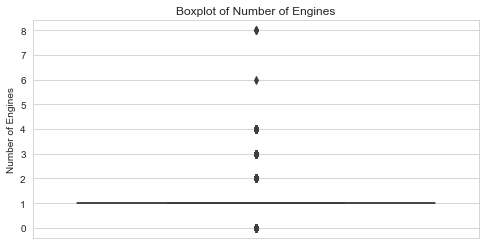

In [262]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = aviation_data, y = 'number_of_engines')
plt.title("Boxplot of Number of Engines")
plt.ylabel("Number of Engines")
plt.show()

In [263]:
# View rows with 8 engines
aviation_data[aviation_data['number_of_engines'] == 8.0]

event_id investigation_type accident_number  event_date  \
84080  20191019X90834           Accident      DCA20CA003  2019-10-17   
85148  20200803X34051           Accident      WPR20CA267  2020-08-03   
85149  20200803X34135           Accident      WPR20CA263  2020-08-03   

             location        country latitude longitude airport_code  \
84080  Tres Pinos, CA  United States  364845N  0121119W          NaN   
85148     Jackson, WY  United States  433515N  1104940W          NaN   
85149     Jackson, WY  United States  433515N  1104940W          NaN   

      airport_name  ... weather_condition broad_phase_of_flight  \
84080          NaN  ...               VMC                   NaN   
85148          NaN  ...               VMC                   NaN   
85149          NaN  ...               VMC                   NaN   

                                           report_status publication_date  \
84080  a software timing error initiated by a battery...       26-09-2020   
85148  The balloon pilots inability to maintain the ...       26-08-2021   
85149  The pilots inability to arrest the descent ra...       26-08-2021   

                  make_model               mm_clean engine_count_display  \
84080  Kitty Hawk HEAVISIDE2  Kitty Hawk HEAVISIDE2                  8.0   
85148          Cameron A 315          Cameron A 315                  8.0   
85149        Lindstrand 310A        Lindstrand 310A                  8.0   

       engine_type_display      engine_configuration          eng_config_clean  
84080             Electric  Electric - 8.0 Engine(s)  Electric - 8.0 Engine(s)  
85148                   Lr        Lr - 8.0 Engine(s)        Lr - 8.0 Engine(s)  
85149                   Lr        Lr - 8.0 Engine(s)        Lr - 8.0 Engine(s)  

[3 rows x 37 columns]

**Comment on outliers:** These are genuine outliers as some airplanes like the Kitty Hawk HEAVISIDE2, Cameron A315 and Lindstrand 310A contain 8 engines total.

### 2. 'total_fatal_injuries'

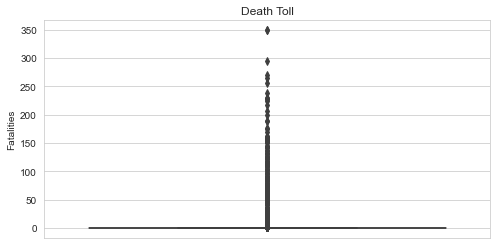

In [264]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = aviation_data, y = 'total_fatal_injuries')
plt.title('Death Toll')
plt.ylabel('Fatalities')
plt.show()

In [265]:
aviation_data['total_fatal_injuries'] = pd.to_numeric(aviation_data['total_fatal_injuries'], errors = 'coerce')
aviation_data['total_fatal_injuries'].skew()

33.01867532377133

### Skewness in 'total_fatal_injuries'

The 'total_fatal_injuries' column displays **a highly positive skew** of **33.02**, indicating that most aircraft accidents result in few or no fatalities, while a small number of events involve disproportionately high death tolls.

### Analytical Decision:
Rather than normalize or transform the data- which could smooth out these critical edge cases- I’ve chosen to preserve the raw values. These outliers, while statistically extreme, reflect the real human impact of aviation disasters.

Adjusting them might make the plots cleaner, but it would also mask the very patterns that matter most in a safety- driven analysis. Accuracy here isn’t just about numbers- it’s about representing reality with integrity!

### 3. 'total_uninjured'

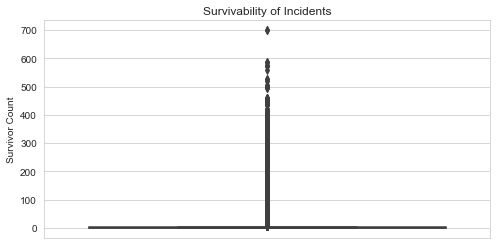

In [266]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = aviation_data, y = 'total_uninjured')
plt.title('Survivability of Incidents')
plt.ylabel('Survivor Count')
plt.show()

In [267]:
aviation_data['total_uninjured'] = pd.to_numeric(aviation_data['total_uninjured'], errors = 'coerce')
aviation_data['total_uninjured'].skew()

9.086104094841762

### Skewness in 'total_uninjured'

The 'total_uninjured' column shows a **highly positive skew** of **9.0861**, indicating that most crashes involved few or no survivors- while a smaller subset saw high survivor counts, likely tied to incidents involving larger commercial aircraft.

### Analytical Decision:
There are over **700 high-end outliers**, but in this case, they’re not just statistical noise- they represent **real lives saved**. Given the significance of this metric in safety analysis, I’ve opted to retain these values as-is.

Suppressing or transforming them may simplify the distribution, but it risks distorting the very patterns that offer insight into survivability. In a dataset like this, nuance matters- !and so does honoring the human reality behind the numbers.

## 9. Cleaning the 'broad_phase_of_flight' Column

The 'broad_phase_of_flight' column indicates the flight stage during which the incident occurred (e.g Takeoff, Landing, Cruise). This information is useful for risk profiling across different operational phases.

In [268]:
# Check null count
print("Null Values in 'broad_phase_of_flight':", aviation_data['broad_phase_of_flight'].isna().sum())

# Check unique value counts to better understand the situation
print("\nUnique value count for 'broad_phase_of_flight':\n", aviation_data['broad_phase_of_flight'].value_counts())

Null Values in 'broad_phase_of_flight': 27165

Unique value count for 'broad_phase_of_flight':
 Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: broad_phase_of_flight, dtype: int64


**Missing Data**:
  - 'nan' values are unreported or unlogged incidents and will thus be replaced with 'Not Reported' to retain transparency and clarity without distorting the original data.
  - Entries marked as 'Unknown' or 'Other' shall be left as-is because they represent valid, albeit ambiguous, information that could still hold analytical value.
  - Preserving 'Unknown' acknowledges cases where the investigation could not determine the flight phase

In [269]:
# ==================== [Clean braod_phase_of_flight] ===================

aviation_data['broad_phase_of_flight'] = aviation_data['broad_phase_of_flight'].fillna('Not Reported')

# Preview
print("\nNull Values after imputation:", aviation_data['broad_phase_of_flight'].isna().sum())

# See results after imputation
print("\nNew value counts after imputation:\n", aviation_data['broad_phase_of_flight'].value_counts())


Null Values after imputation: 0

New value counts after imputation:
 Not Reported    27165
Landing         15428
Takeoff         12493
Cruise          10269
Maneuvering      8144
Approach         6546
Climb            2034
Taxi             1958
Descent          1887
Go-around        1353
Standing          945
Unknown           548
Other             119
Name: broad_phase_of_flight, dtype: int64


## 10. Cleaning the 'amateur_built' Column

When an airplane is classified as "amateur-built" or "home-built," it means:

- It was not manufactured by a certified aircraft company (like Boeing or Cessna), but instead:
    - Built by an individual or group of individuals,

    - Often from a kit or plans purchased from a kit manufacturer,

    - Primarily for education, recreation, or personal use, not commercial aviation.

This attribute may relate to maintenance quality or design variance and is important when profiling risk by aircraft origin.

In [270]:
# Check null value count
print("Null values in 'amateur_built':", aviation_data['amateur_built'].isna().sum())

# Unique value counts 
print("\nUnique value count before imputation:\n", aviation_data['amateur_built'].value_counts())

Null values in 'amateur_built': 102

Unique value count before imputation:
 No     80312
Yes     8475
Name: amateur_built, dtype: int64


**Handling Missing Values**:
  Nulls in this column likely represent cases where the builder status was not documented. Instead of assuming values like 'No' (the most common), I will fill these with 'Not Reported' to preserve the integrity of the dataset and avoid introducing bias.

**Why Not Use Mode?**:
  Using the mode would disproportionately skew the dataset toward the majority class ('No'), which may obscure meaningful patterns in the analysis. By using 'Not Reported', I maintain clarity on which entries were actually incomplete.

This cleaning ensures that the column remains analytically useful while remaining faithful to the original reporting limitations.

In [271]:
# ==================== [Clean amateur_built] ====================

aviation_data['amateur_built'] = aviation_data['amateur_built'].fillna('Not Reported')

# Confirm null values have been handled
print("Null values after imputation:", aviation_data['amateur_built'].isna().sum())

# Check unique counts after imputation
print("\nUnique counts after imputation:\n", aviation_data['amateur_built'].value_counts())

Null values after imputation: 0

Unique counts after imputation:
 No              80312
Yes              8475
Not Reported      102
Name: amateur_built, dtype: int64


This might be a little confusing at first glance so let me break it down:

**Yes:** Aircraft is amateur-built (also called experimental or homebuilt). These are often built from kits or plans by aviation enthusiasts.

**No:** Aircraft is factory-built by a certified manufacturer.

**Not Reported or Unknown:** The build type was either not declared or couldn't be verified.

## 11. Exploring and Cleaning 'total_fatal_injuries'
Check for missing values and list all unique entries in the 'total_fatal_injuries' column to understand the variety and quality of entries, which will guide cleaning and standardization decisions.

In [272]:
# Check for null value counts
print("Null values in 'total_fatal_injuries':", aviation_data['total_fatal_injuries'].isna().sum())

# Check unique values in the column
print("\nUnique values in 'total_fatal_injuries':\n", aviation_data['total_fatal_injuries'].unique())


# ==================== [Clean total_fatal_injuries] ====================

# nan - Not recorded so replace with 'Not Reported'
# Maintain float values as they can coexist with strings 

aviation_data['total_fatal_injuries'] = aviation_data['total_fatal_injuries'].fillna('Not Reported')

# Preview
print("\nNull values in 'total_fatal_injuries':", aviation_data['total_fatal_injuries'].isna().sum())

Null values in 'total_fatal_injuries': 11401

Unique values in 'total_fatal_injuries':
 [  2.   4.   3.   1.  nan   0.   8.  78.   7.   6.   5. 153.  12.  14.
  23.  10.  11.   9.  17.  13.  29.  70. 135.  31. 256.  25.  82. 156.
  28.  18.  43.  15. 270. 144. 174. 111. 131.  20.  73.  27.  34.  87.
  30.  16.  47.  56.  37. 132.  68.  54.  52.  65.  72. 160. 189. 123.
  33. 110. 230.  97. 349. 125.  35. 228.  75. 104. 229.  80. 217. 169.
  88.  19.  60. 113. 143.  83.  24.  44.  64.  92. 118. 265.  26. 138.
 206.  71.  21.  46. 102. 115. 141.  55. 121.  45. 145. 117. 107. 124.
  49. 154.  96. 114. 199.  89.  57. 152.  90. 103. 158. 157.  42.  77.
 127.  50. 239. 295.  58. 162. 150. 224.  62.  66. 112. 188.  41. 176.]

Null values in 'total_fatal_injuries': 0


### Cleaning 'total_fatal_injuries'

The 'total_fatal_injuries' column contains a few missing values ('NaN'), and the non-null entries are whole numbers represented as floats (e.g 1.0, 2.0). This is expected behavior—missing data typically forces the entire column to adopt a float type.

### Decision & Rationale:
- I chose to **retain the float values as-is**, since they’re logically correct and analysis- ready. There's no need to force integer conversion when the decimals don't interfere.
- For missing values, I **did not assume zero fatalities**. Instead, I replaced them with 'Not Reported'— a clear and honest placeholder that avoids introducing misleading assumptions.

This approach prioritizes data integrity and reflects an ethical handling of sensitive human information. In risk analysis, clarity matters just as much as accuracy— and here, both are preserved.

## 12. Exploring and Cleaning 'total_uninjured'
Check for missing values and list all unique entries in the 'total_uninjured' column to understand the variety and quality of entries, which will guide cleaning and standardization decisions.

In [273]:
# Check for null value counts
print("Null values in 'total_uninjured':", aviation_data['total_uninjured'].isna().sum())

# Check unique values in the column
print("\nUnique values in 'total_uninjured':\n", aviation_data['total_uninjured'].unique())


# ==================== [Clean total_uninjured] ====================

# nan - Not recorded so replace with 'Not Reported'
# Maintain float values as they can coexist with strings 

aviation_data['total_uninjured'] = aviation_data['total_uninjured'].fillna('Not Reported')

# Preview
print("\nNull values in 'total_uninjured':", aviation_data['total_uninjured'].isna().sum())

Null values in 'total_uninjured': 5912

Unique values in 'total_uninjured':
 [  0.  nan  44.   2.   1.   3.   6.   4. 149.  12. 182. 154.   5.  10.
   7. 119.  36.  51.  16.  83.   9.  68.  30.  20.  18.   8. 108.  11.
 152.  21.  48.  56. 113. 129. 109.  29.  13.  84.  74. 142. 102. 393.
 128. 112.  17.  65.  67. 136.  23. 116.  22.  57.  58.  73. 203.  31.
 201. 412. 159.  39. 186. 588.  82.  95. 146. 190. 245. 172.  52.  25.
  59. 131. 151. 180. 150.  86.  19. 133. 240.  15. 145. 125. 440.  77.
 122. 205. 289. 110.  79.  66.  87.  78.  49. 104. 250.  33. 138. 100.
  53. 158. 127. 160. 260.  47.  38. 165. 495.  81.  41.  14.  72.  98.
 263. 188. 239.  27. 105. 111. 212. 157.  46. 121.  75.  71.  45.  91.
  99.  85.  96.  50.  93. 276. 365. 371. 200. 103. 189.  37. 107.  61.
  26. 271. 130.  89. 439. 132. 219.  43. 238. 195. 118. 175.  32. 507.
 421.  90. 225. 269. 169. 236. 224. 134. 106. 331. 140.  94. 192. 161.
 270.  69. 436. 213. 233. 115.  42. 167. 137. 114. 148. 222.  92. 375.


### Cleaning 'total_uninjured'

Same reasoning as 'total_fatal_injuries'

## 13. Cleaning and Standardizing the 'country' Column

Addressing inconsistencies and missing values in the 'country' column, which identifies the location of each aviation event.

- **Standardization**: Remove whitespace and ensure consistent capitalization (e.g. 'united states' becomes 'United States').
- **Missing Values**: Imputed with 'Not Recorded' to reflect the absence of data without making assumptions.

Create a new column, 'location_type', to distinguish whether the event occurred domestically or internationally:

- If 'country' is 'United States', label as **Domestic**.
- All other values will be **International**.

In [274]:
# Check null counts
print("Null values in 'country':", aviation_data['country'].isna().sum())

# Standardise country column
aviation_data['country'] = aviation_data['country'].str.strip().str.title()

# nan - not recorded. Imputing method- 'Not Recorded'

aviation_data['country'] = aviation_data['country'].fillna('Not Recorded')
print("\nNull count after imputation:", aviation_data['country'].isna().sum())

# Flag country as either domestic or international.
# Since this dataset is largely US based, the domestic country will be 'United States'. All else will be 'International'
domestic_country = 'United States'
aviation_data['location_type'] = aviation_data['country'].apply(lambda x: 'Domestic' if x == domestic_country else 'International')
aviation_data['location_type'].value_counts()

Null values in 'country': 226

Null count after imputation: 0


Domestic         82248
International     6641
Name: location_type, dtype: int64

In [275]:
# ==================== [Archive Columns for Later Use] ====================

# Define columns to archive
archived_cols = {
    'investigation_type',
    'location',
    'aircraft_category',
    'publication_date',
    'latitude',
    'longitude',
    'airport_name',
    'far_description',
    'report_status',
    'registration_number',
    'schedule',  # High null rate (85%)
    'accident_number',
    'airport_code',
    'air_carrier',
    'total_minor_injuries',
    'total_serious_injuries',
    'number_of_engines'
}

# Separate them from the main dataset
archived_df = aviation_data[archived_cols]
aviation_df = aviation_data.drop(columns = archived_cols)

# Save both datasets to separate CSV files
aviation_df.to_csv("CleanedAviationData.csv", index = False)
archived_df.to_csv("ArchivedAviationData.csv", index = False)

In [276]:
# ==================== [Load cleaned dataset and confirm it's readiness for analysis] ===================

aviation_df = pd.read_csv(r'CleanedAviationData.csv', encoding = 'ISO-8859-1')

aviation_df.head()


c:\Users\lenovo\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning:

Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.



event_id  event_date        country injury_severity aircraft_damage  \
0  20001218X45444  1948-10-24  United States           Fatal       Destroyed   
1  20001218X45447  1962-07-19  United States           Fatal       Destroyed   
2  20061025X01555  1974-08-30  United States           Fatal       Destroyed   
3  20001218X45448  1977-06-19  United States           Fatal       Destroyed   
4  20041105X01764  1979-08-02  United States           Fatal       Destroyed   

       make     model amateur_built    engine_type purpose_of_flight  ...  \
0   Stinson     108-3            No  Reciprocating          Personal  ...   
1     Piper  PA24-180            No  Reciprocating          Personal  ...   
2    Cessna      172M            No  Reciprocating          Personal  ...   
3  Rockwell       112            No  Reciprocating          Personal  ...   
4    Cessna       501            No   Not Reported          Personal  ...   

  total_uninjured weather_condition broad_phase_of_flight      make_model  \
0             0.0           Unknown                Cruise   Stinson 108-3   
1             0.0           Unknown               Unknown  Piper PA24-180   
2    Not Reported               IMC                Cruise     Cessna 172M   
3             0.0               IMC                Cruise    Rockwell 112   
4             0.0               VMC              Approach      Cessna 501   

         mm_clean engine_count_display engine_type_display  \
0   Stinson 108-3                  1.0       Reciprocating   
1  Piper PA24-180                  1.0       Reciprocating   
2     Cessna 172M                  1.0       Reciprocating   
3    Rockwell 112                  1.0       Reciprocating   
4      Cessna 501         Not Reported        Not Reported   

                    engine_configuration  \
0          Reciprocating - 1.0 Engine(s)   
1          Reciprocating - 1.0 Engine(s)   
2          Reciprocating - 1.0 Engine(s)   
3          Reciprocating - 1.0 Engine(s)   
4  Not Reported - Not Reported Engine(s)   

                        eng_config_clean location_type  
0          Reciprocating - 1.0 Engine(s)      Domestic  
1          Reciprocating - 1.0 Engine(s)      Domestic  
2          Reciprocating - 1.0 Engine(s)      Domestic  
3          Reciprocating - 1.0 Engine(s)      Domestic  
4  Not Reported - Not Reported Engine(s)      Domestic  

[5 rows x 21 columns]

In [277]:
# ==================== [IDE - Initial Data Exploration] ====================

# Check number of rows and columns
print(f"The dataset contains {aviation_df.shape[0]} rows and {aviation_df.shape[1]} columns\n")

# Print column names to check for standardization/renaming needs
print("Column Names:\n", aviation_df.columns, "\n")

The dataset contains 88889 rows and 21 columns

Column Names:
 Index(['event_id', 'event_date', 'country', 'injury_severity',
       'aircraft_damage', 'make', 'model', 'amateur_built', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'make_model', 'mm_clean',
       'engine_count_display', 'engine_type_display', 'engine_configuration',
       'eng_config_clean', 'location_type'],
      dtype='object') 



In [278]:
# Get metadata
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   event_id               88889 non-null  object
 1   event_date             88889 non-null  object
 2   country                88889 non-null  object
 3   injury_severity        88889 non-null  object
 4   aircraft_damage        88889 non-null  object
 5   make                   88889 non-null  object
 6   model                  88889 non-null  object
 7   amateur_built          88889 non-null  object
 8   engine_type            88889 non-null  object
 9   purpose_of_flight      88889 non-null  object
 10  total_fatal_injuries   88889 non-null  object
 11  total_uninjured        88889 non-null  object
 12  weather_condition      88889 non-null  object
 13  broad_phase_of_flight  88889 non-null  object
 14  make_model             88889 non-null  object
 15  mm_clean           

In [279]:
# Check summary statistics number_of_engines
aviation_df.describe()

event_id  event_date        country injury_severity  \
count            88889       88889          88889           88889   
unique           87951       14782            216               5   
top     20001212X19172  1984-06-30  United States       No Injury   
freq                 3          25          82248           69576   

       aircraft_damage    make  model amateur_built    engine_type  \
count            88889   88889  88889         88889          88889   
unique               5    7588  11647             3             12   
top        Substantial  Cessna    152            No  Reciprocating   
freq             64148   27149   2367         80312          69530   

       purpose_of_flight  ... total_uninjured weather_condition  \
count              88889  ...           88889             88889   
unique                25  ...             635                 4   
top             Personal  ...             0.0               VMC   
freq               49448  ...           19632             77303   

       broad_phase_of_flight  make_model    mm_clean engine_count_display  \
count                  88889       88889       88889                88889   
unique                    13       18296       18296                    8   
top             Not Reported  Cessna 152  Cessna 152                  1.0   
freq                   27165        2366        2366                69582   

       engine_type_display           engine_configuration  \
count                88889                          88889   
unique                  12                             50   
top          Reciprocating  Reciprocating - 1.0 Engine(s)   
freq                 69530                          63001   

                     eng_config_clean location_type  
count                           88889         88889  
unique                             50             2  
top     Reciprocating - 1.0 Engine(s)      Domestic  
freq                            63001         82248  

[4 rows x 21 columns]

In [280]:
# Get basic statistics of categorical columns
aviation_df.describe(include = 'O').T

count unique                            top   freq
event_id               88889  87951                 20001212X19172      3
event_date             88889  14782                     1984-06-30     25
country                88889    216                  United States  82248
injury_severity        88889      5                      No Injury  69576
aircraft_damage        88889      5                    Substantial  64148
make                   88889   7588                         Cessna  27149
model                  88889  11647                            152   2367
amateur_built          88889      3                             No  80312
engine_type            88889     12                  Reciprocating  69530
purpose_of_flight      88889     25                       Personal  49448
total_fatal_injuries   88889    159                            0.0  41243
total_uninjured        88889    635                            0.0  19632
weather_condition      88889      4                            VMC  77303
broad_phase_of_flight  88889     13                   Not Reported  27165
make_model             88889  18296                     Cessna 152   2366
mm_clean               88889  18296                     Cessna 152   2366
engine_count_display   88889      8                            1.0  69582
engine_type_display    88889     12                  Reciprocating  69530
engine_configuration   88889     50  Reciprocating - 1.0 Engine(s)  63001
eng_config_clean       88889     50  Reciprocating - 1.0 Engine(s)  63001
location_type          88889      2                       Domestic  82248

In [281]:
# See if there are any duplicated values
aviation_df.duplicated().sum()

28

### Why 28 Duplicates Appeared After Cleaning

When inspecting the raw data source, no duplicate rows were detected. However, after cleaning and feature engineering, 28 duplicates duplicate values appeared.

#### Why Did This Happen?
The cleaning process involved:
- Filling missing values with standard placeholders (e.g 'Not Reported').
- Standardizing strings (e.g (.str.strip().str.title())).
- Creating new composite features like make_model and engine_configuration.

These transformations homogenized previously unique rows that differed only in whitespace, casing, or missing values.

For example:
- One row may have had "Cessna" and another "  cessna " - after cleaning, both become "Cessna".
- Missing values in some columns filled with the same placeholder ('Not Reported') can cause distinct rows to collapse into identical ones.

#### Validating my decision to Drop Them
These 28 rows are now exact copies and add no new information. Removing them:
- Improves analysis accuracy.
- Prevents bias in visualizations and aggregations.
- Preserves semantic integrity, since only exact row-level duplication is removed — not multi-aircraft entries under the same event_id.

**Final Conclusion:** The duplicates didn’t exist before cleaning but were introduced as a side effect of standardization — and should be removed.

In [282]:
aviation_df = aviation_df.drop_duplicates()

print("Preview duplicates after dropping:", aviation_df.duplicated().sum())

Preview duplicates after dropping: 0


In [283]:
# New shape
print(f"The dataset contains {aviation_df.shape[0]} rows and {aviation_df.shape[1]} columns")

The dataset contains 88861 rows and 21 columns


In [284]:
aviation_df.isna().sum()

event_id                 0
event_date               0
country                  0
injury_severity          0
aircraft_damage          0
make                     0
model                    0
amateur_built            0
engine_type              0
purpose_of_flight        0
total_fatal_injuries     0
total_uninjured          0
weather_condition        0
broad_phase_of_flight    0
make_model               0
mm_clean                 0
engine_count_display     0
engine_type_display      0
engine_configuration     0
eng_config_clean         0
location_type            0
dtype: int64

### TIME SERIES ANALYSIS

Time series analysis allows me to observe how aviation-related patterns evolve over time. By examining trends across years, months, or even specific dates, I can uncover insights into how risks, behaviors, and operational dynamics shift.

This kind of analysis is especially valuable for:
- Detecting long-term trends or seasonality,
- Spotting unusual spikes or drops that may signal external influences,
- Comparing how different categories behave over time.

Whether the goal is to understand the impact of safety regulations, evaluate shifts in operational risks, or simply observe frequency changes, time series analysis helps transform raw timestamps into a meaningful timeline of events.

It's not just about *when* something happened- but what that timing can tell us.

In [285]:
# Convert to datetime
aviation_df['event_date'] = pd.to_datetime(aviation_df['event_date'], errors = 'coerce')

# Basic descriptive statistics
print("Basic Descriptive Statistics:")
print("Earliest date:", aviation_df['event_date'].min())
print("Latest date:", aviation_df['event_date'].max())
print("Total unique dates:", aviation_df['event_date'].nunique())

# Resample to yearly incident count
annual_trend = (aviation_df.set_index('event_date').resample('Y').size().reset_index(name = 'incident_count'))

# Plot
fig = px.line(annual_trend, x = 'event_date', y = 'incident_count', title = 'Annual Trend of Aviation Incidents',
    labels = {
        'event_date': 'Date',
        'incident_count': 'Number of Incidents'
    }
)

# Customise plot with nice looking fonts and colors
fig.update_traces(mode = 'lines + markers')
fig.update_layout(
    height = 500,
    width = 1200,
    plot_bgcolor = '#f4f4f4',
    paper_bgcolor = '#f4f4f4',
    font = dict(family = 'Segoe UI', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Segoe UI Semibold', color = '#003366'),
    xaxis = dict(
        title = 'Year',
        showgrid = True,
        gridcolor = 'lightgrey',
        linecolor = 'gray',
        showline = True
    ),
    yaxis = dict(
        title = 'Incident Count',
        showgrid = True,
        gridcolor = 'lightgrey',
        linecolor = 'gray',
        showline = True
    )
)

fig.show()

Basic Descriptive Statistics:
Earliest date: 1948-10-24 00:00:00
Latest date: 2022-12-29 00:00:00
Total unique dates: 14782


## UNIVARIATE ANALYSIS

Finally- time to shine the spotlight on individual features in the dataset.

### Goal:
To understand the distribution, structure, and frequency of each variable on its own. This step helps uncover dominant values, potential outliers, and category imbalances that may influence deeper analyses later on.

Using a mix of visualizations and frequency counts, I’ll explore how each feature behaves independently- laying the groundwork for more nuanced bivariate and multivariate insights to come.

Before we connect the dots, we need to understand each one clearly.

### 1. injury_count

In [286]:
# Count values
injury_count = aviation_df['injury_severity'].value_counts().reset_index()
injury_count.columns = ['injury_severity', 'count']

# Custom color
injury_palette = {
    'Fatal': '#d62728',
    'Serious': '#ff7f0e',
    'Minor': '#bcbd22',
    'No Injury': '#2ca02c',
    'Not Reported': '#7f7f7f'
}

# Plot figure
fig = px.bar(injury_count, x = 'injury_severity', y = 'count', 
    title = 'Injury Severity Distribution',
    color = 'injury_severity',
    color_discrete_map = injury_palette,
    text = 'count'
)

# Layout styling
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title = 'Severity Type',
    yaxis_title = 'Number of Incidents',
    title_font_size = 18,
    xaxis_tickangle = 0,
    uniformtext_minsize = 8,
    uniformtext_mode = 'hide'
)

fig.show()

### 2. total_fatal_injuries

In [287]:
aviation_df['total_fatal_injuries'] = pd.to_numeric(aviation_df['total_fatal_injuries'], errors = 'coerce')

# Define bins and labels for grouping fatalities
bins = [-1, 0, 5, 10, 20, 50, 100, 200, float('inf')]
labels = ["0", "1–5", "6–10", "11–20", "21–50", "51–100", "101–200", "200+"]

# Create the fatality group column
aviation_df['fatality_group'] = pd.cut(aviation_df['total_fatal_injuries'], bins = bins, labels = labels)

# Define the correct order of fatality groups
ordered_groups = ["0", "1–5", "6–10", "11–20", "21–50", "51–100", "101–200", "200+"]

# Plot figure
fig = px.histogram(aviation_df, x='fatality_group', 
    title = 'Accidents Grouped by Fatality Ranges',
    category_orders = {'fatality_group': ordered_groups},
    color_discrete_sequence = ['indianred']
)

# Add labels
fig.update_layout(
    xaxis_title = 'Fatality Range',
    yaxis_title = 'Number of Accidents'
)

fig.show()

### 3. total_uninjured

In [288]:
aviation_df['total_uninjured'] = pd.to_numeric(aviation_df['total_uninjured'], errors='coerce')

# Define bins and labels for survivor ranges
bins = [-1, 0, 5, 10, 20, 50, 100, 200, float('inf')]
labels = ["0", "1–5", "6–10", "11–20", "21–50", "51–100", "101–200", "200+"]

# Create survivor group column
aviation_df['survivor_group'] = pd.cut(aviation_df['total_uninjured'], bins = bins, labels = labels)

# Plot histogram
fig = px.histogram(aviation_df, x = 'survivor_group',
    title = 'Accidents Grouped by Survivor Ranges',
    category_orders = {'survivor_group': labels},
    color_discrete_sequence = ['mediumseagreen']
)

# Add labels
fig.update_layout(
    xaxis_title='Survivor Range',
    yaxis_title='Number of Accidents'
)

fig.show()

### 4. aircraft_damage

In [289]:
# Get value counts
damage_count = aviation_df['aircraft_damage'].value_counts().reset_index()
damage_count.columns = ['aircraft_damage', 'count']

# Define custom color palette from color hunt
damage_palette = {
    'Destroyed': '#d62728',
    'Substantial': '#ff7f0e',
    'Minor': '#2ca02c',
    'Unknown': '#bcbd22',
    'Not Reported': '#7f7f7f'
}

# Plot figure
fig = px.bar(damage_count, x = 'aircraft_damage', y = 'count',
    color = 'aircraft_damage',
    color_discrete_map = damage_palette,
    text = 'count',
    title = 'Extent of Aircraft Damage'
)

# Add labels
fig.update_traces(textposition = 'outside')
fig.update_layout(
    xaxis_title = 'Aircraft Damage Category',
    yaxis_title = 'Number of Incidents',
    title_font_size = 18,
    xaxis_tickangle = 0,
    uniformtext_minsize = 8,
    uniformtext_mode = 'hide'
)

fig.show()

### 5. mm_clean

In [290]:
# Get top 15 make & model combinations
top_make_model = aviation_df['mm_clean'].value_counts().head(15).reset_index()
top_make_model.columns = ['mm_clean', 'count']

# Plot figure
fig = px.bar(top_make_model, x='count', y='mm_clean',
    orientation='h',
    title='Top 15 Aircraft Make & Model by Number of Incidents',
    color='count',
    color_continuous_scale='Reds'
)

# Add labels
fig.update_layout(
    xaxis_title = 'Total Count',
    yaxis_title = 'Make & Model',
    title_font_size = 18,
    yaxis=dict(autorange = "reversed"), 
    uniformtext_minsize = 8,
    uniformtext_mode = 'hide'
)

# Text outside bars
fig.update_traces(textposition = 'outside')

fig.show()

### 6. purpose_of_flight

In [291]:
# Get top 10 purposes of flight
purpose_counts = aviation_df['purpose_of_flight'].value_counts().head(10).reset_index()
purpose_counts.columns = ['purpose_of_flight', 'count']

# Plot
fig = px.bar(purpose_counts, x = 'count', y = 'purpose_of_flight', orientation = 'h',
    title = 'Incidents by Flight Purpose',
    color = 'count',
    color_continuous_scale = 'tealrose'
)

# Add labels
fig.update_traces(textposition = 'outside', width = 0.6, textfont_size = 12)
fig.update_layout(
    xaxis_title='Number of Incidents',
    yaxis_title='Flight Purpose',
    title_font_size=18,
    yaxis=dict(autorange='reversed'),
    bargap=0.05
)

fig.show()

### 7. weather_condition

VMC             77278
IMC              5975
Not Reported     4491
Unknown          1117
Name: weather_condition, dtype: int64


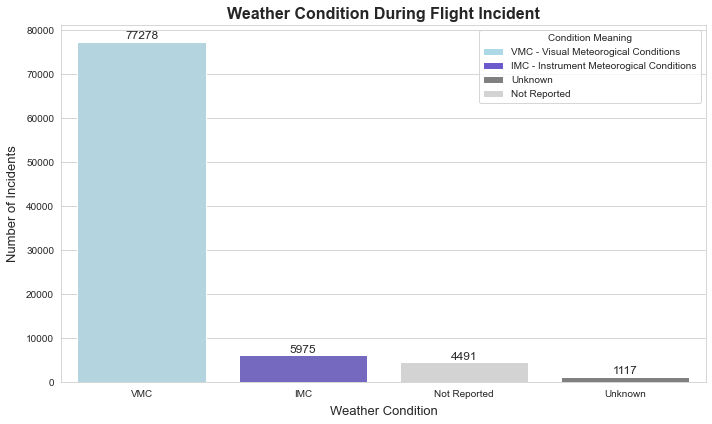

In [292]:
weather_types = aviation_df['weather_condition'].value_counts()
print(weather_types)

# Define custom color palette for weather_condition
weather_palette = {
    'VMC': 'lightblue',        
    'IMC': 'slateblue',          
    'Unknown': 'gray',       
    'Not Reported': 'lightgray'
} 

# Create Legend
legend_elements = [
    Patch(facecolor = 'lightblue', label = 'VMC - Visual Meteorogical Conditions'),
    Patch(facecolor = 'slateblue', label = 'IMC - Instrument Meteorogical Conditions'),
    Patch(facecolor = 'gray', label = 'Unknown'),
    Patch(facecolor = 'lightgray', label = 'Not Reported')
]

# Plot figure
plt.figure(figsize = (10, 6))
sns.countplot( data = aviation_df, x = 'weather_condition',
    order = aviation_df['weather_condition'].value_counts().index,
    palette = weather_palette
)

# Add labels
plt.title('Weather Condition During Flight Incident', fontsize = 16, weight = 'bold')
plt.xlabel('Weather Condition', labelpad=7, fontsize = 13)
plt.ylabel('Number of Incidents', labelpad=7, fontsize = 13)
plt.xticks(rotation = 0)

# Annotate bars
for index, value in enumerate(weather_types.values):
    plt.text(index, value + 750, str(value), ha = 'center', fontsize = 12)

# Add legend
plt.legend(handles = legend_elements, title = 'Condition Meaning', loc = 'upper right')

plt.tight_layout()
plt.show()

### 8. broad_phase_of_flight

In [293]:
# Get counts
broad_phase_counts = aviation_df['broad_phase_of_flight'].value_counts().reset_index()
broad_phase_counts.columns = ['broad_phase_of_flight', 'count']

# Plot figure
fig = px.bar(broad_phase_counts, x = 'count', y = 'broad_phase_of_flight',
    orientation = 'h',
    title = 'Reported Incidents Across Different Flight Phases',
    color = 'count',
    color_continuous_scale = 'sunset'
)

# Style
fig.update_traces(textposition = 'outside', width = 0.6, textfont_size = 12)

# Add labels
fig.update_layout(
    xaxis_title = 'Number of Incidents',
    yaxis_title = 'Phase of Flight',
    title_font_size = 18,
    yaxis=dict(autorange = 'reversed'),
    bargap = 0.05
)

fig.show()

### 9. amateur_built

In [294]:
# Get counts
amateur_built_count = aviation_df['amateur_built'].value_counts().reset_index()
amateur_built_count.columns = ['amateur_built', 'count']

# Plot
fig = px.bar(amateur_built_count, x = 'amateur_built', y = 'count',
    text = 'count',
    title = 'Homebuilt Vs Factorybuilt Aircrafts',
    color = 'amateur_built',
    color_discrete_sequence = ['Purple']

)

# Style and annotate
fig.update_traces(
    textposition = 'outside',
    textfont_size = 12,
    width = 0.6
)

# Add labels
fig.update_layout(
    xaxis_title = 'Build Type',
    yaxis_title = 'Number of Incidents',
    title_font_size = 18,
    xaxis_tickangle = 0,
    showlegend = False,
    bargap = 0.05
)

fig.show()

### 10. country

In [295]:
# Prepare data
top_countries = aviation_df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'count']

# Plot
fig = px.bar(top_countries, x = 'count', y = 'country',
    orientation='h',
    title='Top 10 Countries by Number of Incidents',
    color='count',
    color_continuous_scale='Viridis'
)

# Styling
fig.update_traces(width = 0.6)

# Add labels
fig.update_layout(
    xaxis_title = 'Number of Incidents',
    yaxis_title = 'Country',
    title_font_size = 18,
    yaxis=dict(autorange = 'reversed'),
    bargap = 0.05
)

fig.show()

### 11. location_type

Domestic         82223
International     6638
Name: location_type, dtype: int64


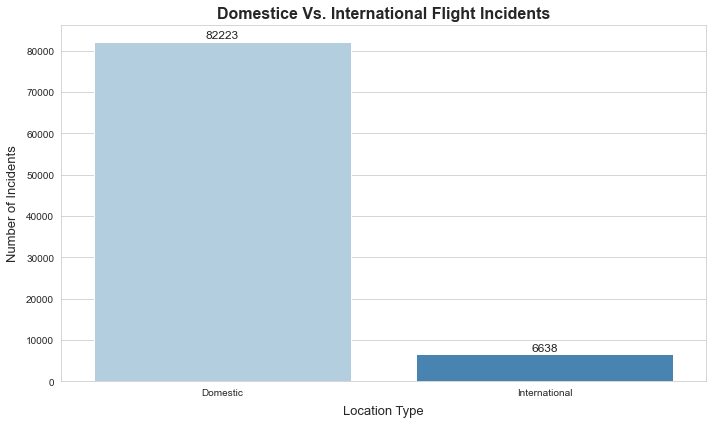

In [296]:
location_count = aviation_df['location_type'].value_counts()
print(location_count)

# Plot figure
plt.figure(figsize = (10, 6))
sns.countplot(data = aviation_df, x = 'location_type', order = aviation_df['location_type'].value_counts().index, palette = 'Blues')

# Add labels 
plt.title('Domestice Vs. International Flight Incidents', fontsize = 16, weight = 'bold')
plt.xlabel('Location Type', labelpad = 7, fontsize = 13)
plt.ylabel('Number of Incidents', labelpad = 7, fontsize = 13)
plt.xticks(rotation = 0)

# Annotate bars
for index, value in enumerate(location_count.values):
    plt.text(index, value + 750, str(value), ha = 'center', fontsize = 12)

plt.tight_layout()
plt.show()

### 12. engine_type

In [297]:
# Get counts
engine_type_counts = aviation_df['engine_type'].value_counts().reset_index()
engine_type_counts.columns = ['engine_type', 'count']

# Plot
fig = px.bar(engine_type_counts, x = 'count', y = 'engine_type',
    orientation = 'h',
    text = 'count',
    color = 'count',
    color_continuous_scale = 'YlGnBu',
    title = 'Engine Type Distribution'
)

# Style
fig.update_traces(textposition = 'outside', textfont_size = 12, width = 0.6)

# Styling
fig.update_layout(
    xaxis_title='Number of Incidents',
    yaxis_title='Engine Type',
    title_font_size=18,
    yaxis=dict(autorange='reversed'),
    bargap=0.1,
    showlegend=False
)

fig.show()

### 13. engine_count_display

1.0             69564
2.0             11072
Not Reported     6081
0.0              1226
3.0               483
4.0               431
8.0                 3
6.0                 1
Name: engine_count_display, dtype: int64


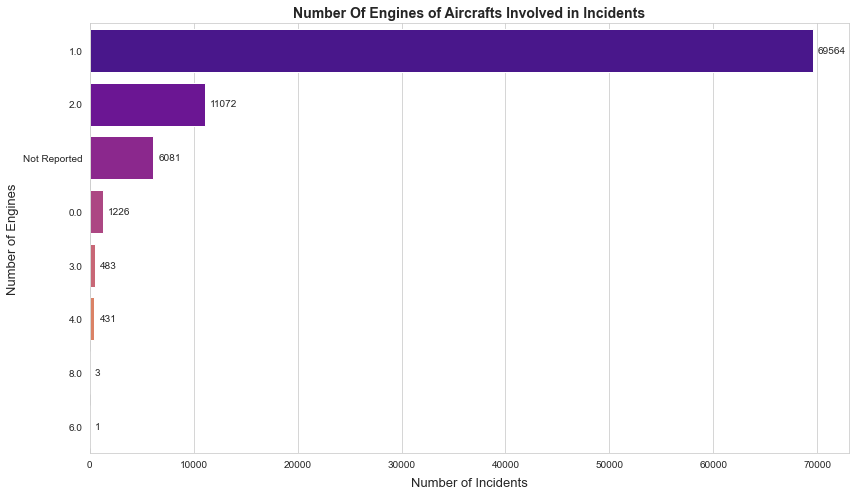

In [298]:
eng_count_disp = aviation_df['engine_count_display'].value_counts()
print(eng_count_disp)

# Plot figure
plt.figure(figsize = (12, 7))
sns.barplot(y = eng_count_disp.index, x = eng_count_disp.values, palette = 'plasma')

# Annotate bars
for index, value in enumerate(eng_count_disp.values):
    plt.text(value + 500, index, str(value), va = 'center')

# Add labels
plt.title("Number Of Engines of Aircrafts Involved in Incidents", fontsize = 14, weight = 'bold')
plt.xlabel("Number of Incidents", fontsize = 13, labelpad = 7.5)
plt.ylabel("Number of Engines", fontsize = 13)
plt.tight_layout()

plt.show()

# BIVARIATE ANALYSIS

Time to explore the relationships between pairs of variables to uncover potential associations, trends, or disparities. 

**Goal:** Go beyond individual distributions and understand how variables interact with each other.

Because in data- as in life- context is everything!

### TIME SERIES ANALYSIS

In [299]:
# Ensure fatalities are numeric
aviation_df['total_fatal_injuries'] = pd.to_numeric(aviation_df['total_fatal_injuries'], errors = 'coerce')

# Group total fatalities by year
fatalities_by_year = (aviation_df.set_index('event_date').resample('Y')['total_fatal_injuries'].sum().reset_index())

# Plot figure
fig = px.line(fatalities_by_year, x ='event_date', y = 'total_fatal_injuries',
    title = 'Trend of Fatalities in Aviation Incidents Over Time',
    labels = {
        'event_date': 'Date',
        'total_fatal_injuries': 'Total Fatal Injuries'
    },
)

# Customise figure
fig.update_layout(
    height = 550,
    width = 900,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Segoe UI', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Segoe UI Semibold', color = '#003366'),
    xaxis = dict(
        gridcolor = 'lightgrey',
        title = 'Year',
        showline = True,
        linecolor = 'gray'
    ),
    yaxis = dict(
        gridcolor = 'lightgrey',
        title = 'Total Fatal Injuries',
        showline = True,
        linecolor = 'gray'
    )
)

fig.show()

In [300]:
# Group by year and weather_condition, count incidents
weather_trend = (aviation_df.set_index('event_date')
    .groupby([pd.Grouper(freq = 'Y'), 'weather_condition'])
    .size()
    .reset_index(name = 'incident_count')
)

# Plot figure
fig = px.line(weather_trend, x = 'event_date', y = 'incident_count',
    color = 'weather_condition',
    title = 'Trend of Aviation Incidents by Weather Condition Over Time',
    labels = {
        'event_date': 'Year',
        'incident_count': 'Number of Incidents',
        'weather_condition': 'Weather Condition'
    },
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Style the figure
fig.update_layout(
    height=600,
    width=950,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    font=dict(family='Segoe UI', size=13, color='#1f2a34'),
    title_font=dict(size=20, family='Segoe UI Semibold', color='#003366'),
    xaxis=dict(showline=True, linecolor='gray', gridcolor='lightgrey'),
    yaxis=dict(showline=True, linecolor='gray', gridcolor='lightgrey'),
    legend_title_text='Weather Condition'
)

fig.show()

In [301]:
# Get top 10 most common aircraft models
top_models = aviation_df['mm_clean'].value_counts().head(10).index

# Filter to only include top models
top_mms = aviation_df[aviation_df['mm_clean'].isin(top_models)]

# Group by year and mm_clean
model_trends = (top_mms.set_index('event_date')
    .groupby([pd.Grouper(freq = 'Y'), 'mm_clean'])
    .size()
    .reset_index(name = 'incident_count')
)

# Plot figure
fig = px.line(model_trends, x = 'event_date', y = 'incident_count', 
    color = 'mm_clean',
    title = 'Incident Trends of Top Aircraft Make/Models Over Time',
    labels = {
        'event_date': 'Year',
        'incident_count': 'Number of Incidents',
        'mm_clean': 'Make & Model'
    },
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Styling
fig.update_layout(
    height = 600,
    width = 950,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Segoe UI', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Segoe UI Semibold', color = '#003366'),
    xaxis = dict(showline = True, linecolor = 'gray', gridcolor = 'lightgrey'),
    yaxis = dict(showline = True, linecolor = 'gray', gridcolor = 'lightgrey'),
    legend_title_text = 'Make & Model'
)

fig.show()

In [302]:
# Filter out 'Unknown' and 'Not Reported' engine types and store in a copy dataset
df_clean = aviation_df[
    ~aviation_df['engine_type'].isin(['Unknown', 'Not Reported'])
].copy()

# Group by year and engine type
engine_trends = (df_clean.set_index('event_date')
    .groupby([pd.Grouper(freq = 'Y'), 'engine_type'])
    .size()
    .reset_index(name = 'incident_count')
)

# Plot figure
fig = px.line(engine_trends, x = 'event_date', y = 'incident_count',
    color = 'engine_type',
    title = 'Engine Type Incident Trends Over Time',
    labels = {
        'event_date': 'Year',
        'incident_count': 'Number of Incidents',
        'engine_type': 'Engine Type'
    },
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Styling
fig.update_layout(
    height = 600,
    width = 950,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Segoe UI', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Segoe UI Semibold', color = '#003366'),
    xaxis = dict(showline = True, linecolor = 'gray', gridcolor = 'lightgrey'),
    yaxis = dict(showline = True, linecolor = 'gray', gridcolor = 'lightgrey'),
    legend_title_text = 'Engine Type'
)

fig.show()

In [303]:
# Group by year and purpose_of_flight
flight_trends = (aviation_df.set_index('event_date')
    .groupby([pd.Grouper(freq = 'Y'), 'purpose_of_flight'])
    .size()
    .reset_index(name = 'incident_count')
)

# Plot with Plotly
fig = px.line(flight_trends, x = 'event_date', y = 'incident_count',
    color = 'purpose_of_flight',
    title = 'Incident Trends by Purpose of Flight',
    labels = {
        'event_date': 'Year',
        'incident_count': 'Number of Incidents',
        'purpose_of_flight': 'Purpose of Flight'
    },
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Styling
fig.update_layout(
    height = 600,
    width = 1200,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Segoe UI', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Segoe UI Semibold', color = '#003366'),
    xaxis = dict(showline = True, linecolor = 'gray', gridcolor = 'lightgrey'),
    yaxis = dict(showline = True, linecolor = 'gray', gridcolor = 'lightgrey'),
    legend_title_text = 'Flight Purpose'
)

fig.show()

### CORRELATION ANALYSIS

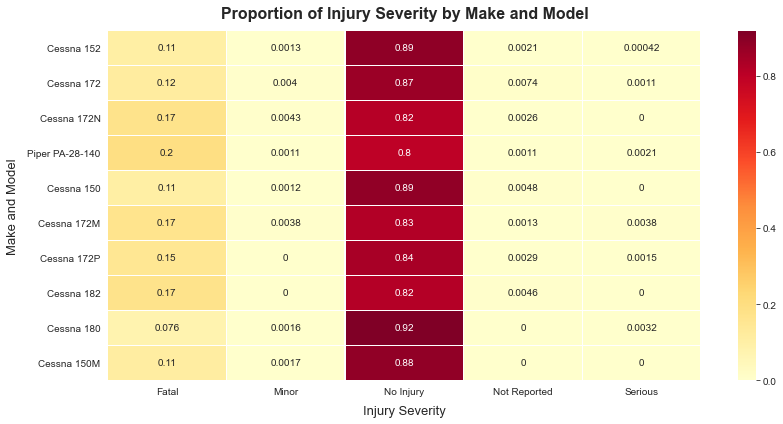

In [304]:
# Filter the top 10 make_model values
top_mm = aviation_df['make_model'].value_counts().head(10).index
filtered_df = aviation_df[aviation_df['make_model'].isin(top_mm)]

# Define parameterS for crosstabulation
crosstab_mm = pd.crosstab(aviation_df['make_model'], aviation_df['injury_severity'], normalize = 'index')
crosstab_mm = crosstab_mm.loc[top_mm]

# Plot figure
plt.figure(figsize = (12, 6))
sns.heatmap(crosstab_mm, annot = True, cmap = 'YlOrRd', linewidths = .5)
plt.title('Proportion of Injury Severity by Make and Model', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Injury Severity', fontsize = 13, labelpad = 8)
plt.ylabel('Make and Model', fontsize = 13, labelpad = 8)
plt.tight_layout()

plt.show()

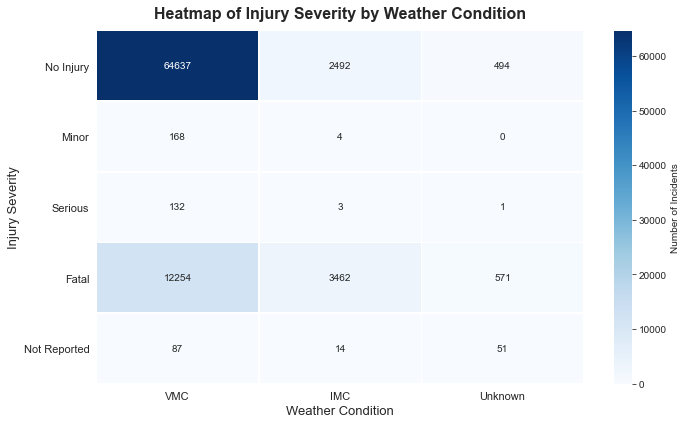

In [305]:
# Ensure injury_severity and weather_condition are ordered
injury_order = ['No Injury', 'Minor', 'Serious', 'Fatal', 'Not Reported']
weather_order = ['VMC', 'IMC', 'Unknown']

aviation_df['injury_severity'] = pd.Categorical(aviation_df['injury_severity'], categories = injury_order, ordered = True)
aviation_df['weather_condition'] = pd.Categorical(aviation_df['weather_condition'], categories = weather_order, ordered = True)

# Create crosstab
heatmap_data = pd.crosstab(aviation_df['injury_severity'], aviation_df['weather_condition'])
heatmap_data = heatmap_data.loc[injury_order] 
heatmap_data = heatmap_data[weather_order]     

# Plot figure
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 0.5, cbar_kws = {'label': 'Number of Incidents'})

# Add labels
plt.title('Heatmap of Injury Severity by Weather Condition', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Weather Condition', fontsize = 13)
plt.ylabel('Injury Severity', fontsize = 13)
plt.xticks(fontsize = 11)
plt.yticks(ticks = np.arange(len(injury_order)) + 0.5, labels = injury_order, fontsize = 11, rotation = 0)
plt.tight_layout()

plt.show()

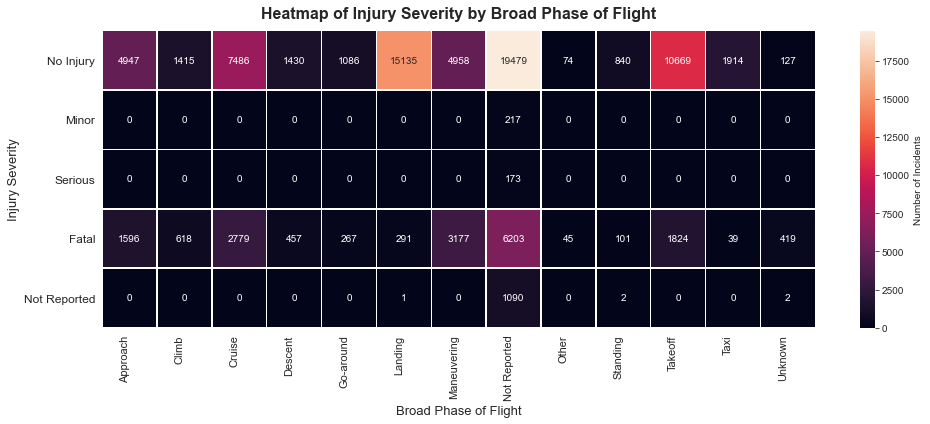

In [306]:
# Define and apply category order
injury_order = ['No Injury', 'Minor', 'Serious', 'Fatal', 'Not Reported']
aviation_df['injury_severity'] = pd.Categorical(
    aviation_df['injury_severity'],
    categories = injury_order,
    ordered = True
)

# Create crosstab
heatmap_data = pd.crosstab(aviation_df['injury_severity'], aviation_df['broad_phase_of_flight'])

# Reorder rows by injury severity
heatmap_data = heatmap_data.loc[injury_order]

# Plot figure
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
sns.heatmap(heatmap_data, cmap = 'rocket', annot = True, fmt = 'd', linewidths = 0.5, cbar_kws = {'label': 'Number of Incidents'})

# Add labels
plt.title('Heatmap of Injury Severity by Broad Phase of Flight', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Broad Phase of Flight', fontsize = 13)
plt.ylabel('Injury Severity', fontsize = 13)
plt.xticks(rotation = 90, ha = 'right', fontsize = 11)
plt.yticks(ticks = np.arange(len(injury_order)) + 0.5, labels = injury_order, fontsize = 12, rotation = 0)
plt.tight_layout()

plt.show()

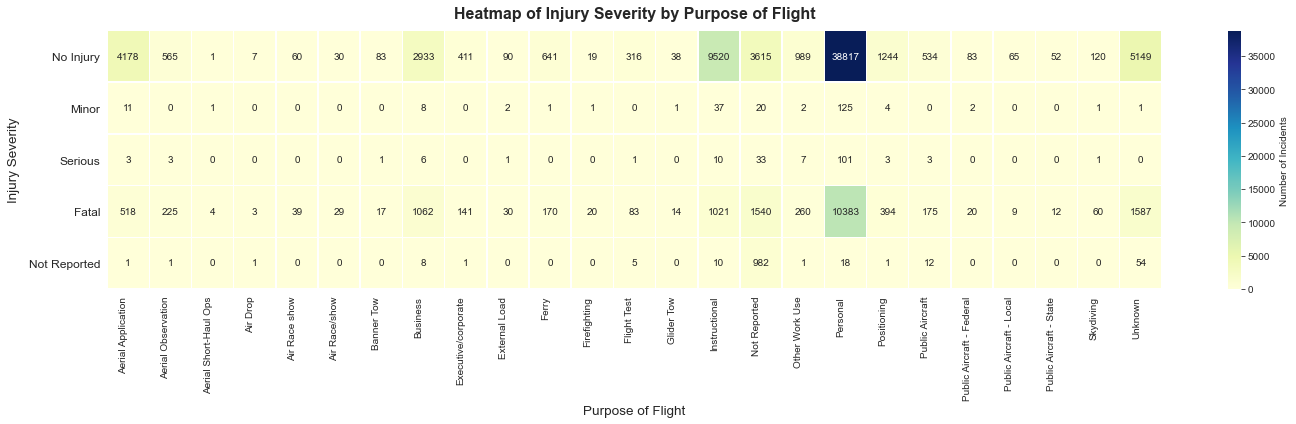

In [307]:
# Create crosstab
heatmap_data = pd.crosstab(aviation_df['injury_severity'], aviation_df['purpose_of_flight'])

# Plot figure
plt.figure(figsize = (20, 6))
sns.heatmap(heatmap_data, cmap = 'YlGnBu', linewidths = 0.5, annot = True, fmt = 'd', cbar_kws = {'label': 'Number of Incidents'})

# Add labels
plt.title('Heatmap of Injury Severity by Purpose of Flight', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Purpose of Flight', fontsize = 13.5)
plt.ylabel('Injury Severity', fontsize = 13.5, labelpad = 9)
plt.xticks(rotation = 90, ha = 'right')
plt.yticks(ticks = np.arange(len(injury_order)) + 0.5, labels = injury_order, fontsize = 12, rotation = 0)
plt.tight_layout()

plt.show()

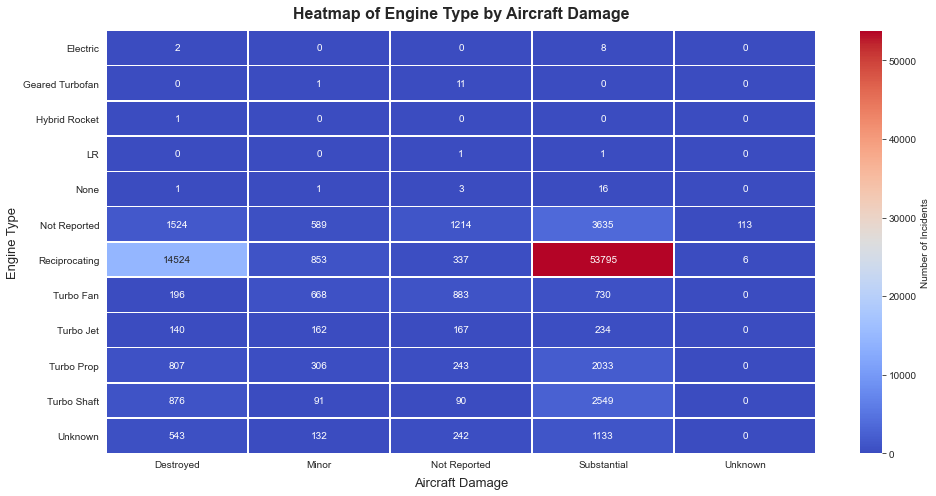

In [308]:
# Create a crosstab of Engine Type and Aircraft Damage
heatmap_data = pd.crosstab(aviation_df['engine_type'], aviation_df['aircraft_damage'])

# Plot figure
plt.figure(figsize = (14, 7))
sns.heatmap(heatmap_data, annot = True, fmt = 'd', cmap = 'coolwarm', linewidths = 0.5, cbar_kws = {'label': 'Number of Incidents'})

# Add labels
plt.title('Heatmap of Engine Type by Aircraft Damage', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Aircraft Damage', fontsize = 13, labelpad = 7)
plt.ylabel('Engine Type', fontsize = 13)
plt.xticks(rotation = 0)
plt.tight_layout()

plt.show()

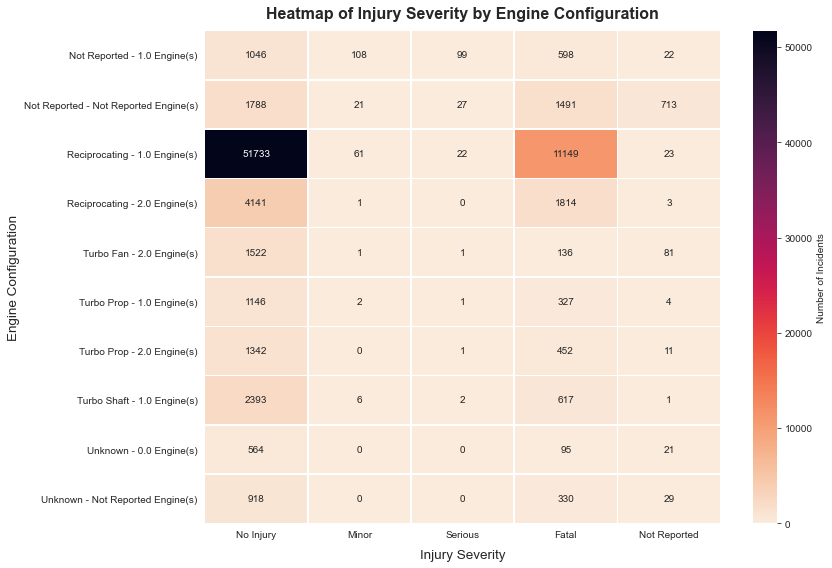

In [309]:
# Filter top engine configurations to reduce clutter
top_configs = aviation_df['engine_configuration'].value_counts().head(10).index
filtered_df = aviation_df[aviation_df['engine_configuration'].isin(top_configs)]

# Create crosstab
heatmap_data = pd.crosstab(filtered_df['engine_configuration'], filtered_df['injury_severity'])

# Plot figure
plt.figure(figsize = (12, 8))
sns.heatmap(heatmap_data, annot = True, fmt = 'd', cmap = 'rocket_r', linewidths = 0.5, cbar_kws = {'label': 'Number of Incidents'})

# Add labels
plt.title('Heatmap of Injury Severity by Engine Configuration', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Injury Severity', fontsize = 13.5, labelpad = 9)
plt.ylabel('Engine Configuration', fontsize = 13.5)
plt.tight_layout()

plt.show()

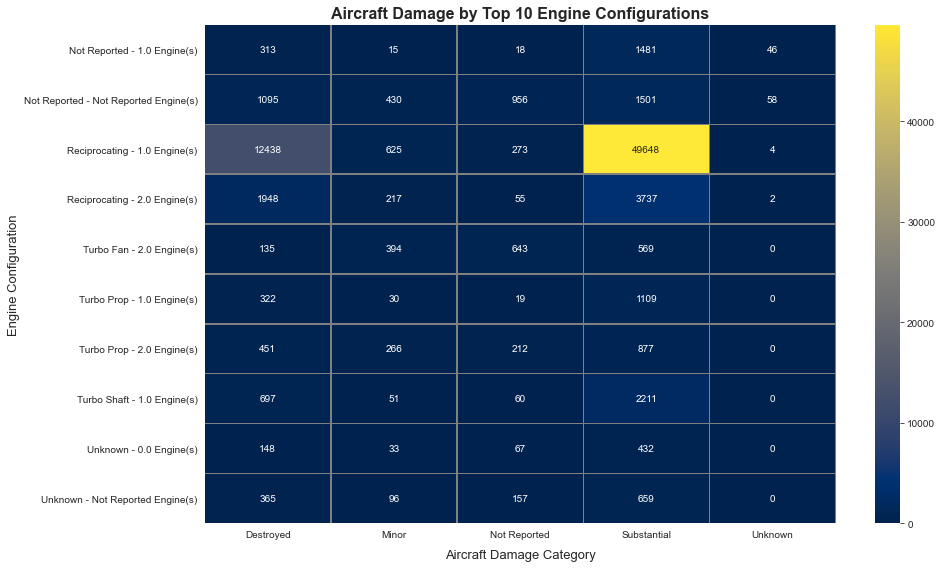

In [310]:
# Get top 10 engine configurations
top_engine_configs = aviation_df['engine_configuration'].value_counts().head(10).index
filtered_df = aviation_df[aviation_df['engine_configuration'].isin(top_engine_configs)]

# Create crosstab
heatmap_data = pd.crosstab(filtered_df['engine_configuration'], filtered_df['aircraft_damage'])

# Plot figure
plt.figure(figsize = (14, 8))
sns.heatmap(heatmap_data, annot = True, fmt = 'd', cmap = 'cividis', linewidths = 0.5, linecolor = 'gray')

# Add labels
plt.title('Aircraft Damage by Top 10 Engine Configurations', fontsize = 16, weight = 'bold')
plt.xlabel('Aircraft Damage Category', fontsize = 13, labelpad = 9)
plt.ylabel('Engine Configuration', fontsize = 13)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.tight_layout()

plt.show()

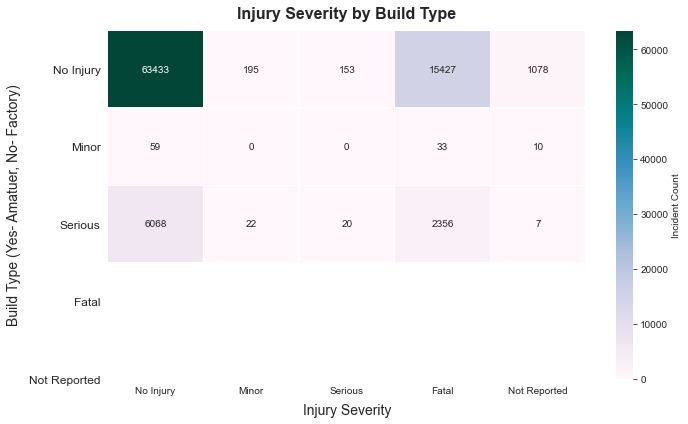

In [311]:
# Create a crosstab
heatmap_data = pd.crosstab(aviation_df['amateur_built'], aviation_df['injury_severity'])

# Plot figure
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, annot = True, fmt = 'd', cmap = 'PuBuGn', linewidths = 0.5, cbar_kws = {'label': 'Incident Count'})

# Add labels
plt.title('Injury Severity by Build Type', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Injury Severity', fontsize =14, labelpad = 8)
plt.ylabel('Build Type (Yes- Amatuer, No- Factory)', fontsize = 14, labelpad = 8)
plt.yticks(ticks = np.arange(len(injury_order)) + 0.5, labels = injury_order, fontsize = 12, rotation = 0)
plt.tight_layout()

plt.show()

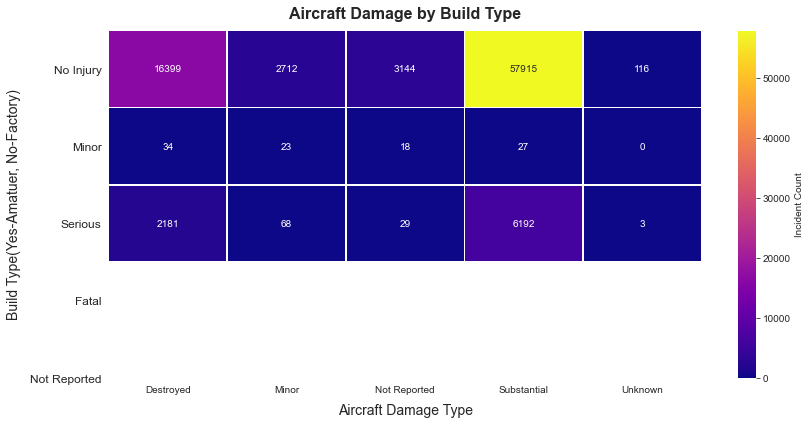

In [312]:
# Create a cross-tabulation table
heatmap_data = pd.crosstab(aviation_df['amateur_built'], aviation_df['aircraft_damage'])

# Plot figure
plt.figure(figsize = (12, 6))
sns.heatmap(heatmap_data, annot = True, fmt = 'd', cmap = 'plasma', linewidths = 0.5, cbar_kws = {'label': 'Incident Count'})

# Add labels
plt.title('Aircraft Damage by Build Type', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Aircraft Damage Type', fontsize = 14, labelpad = 9)
plt.ylabel('Build Type(Yes-Amatuer, No-Factory)', fontsize = 14, labelpad = 9)
plt.yticks(ticks = np.arange(len(injury_order)) + 0.5, labels = injury_order, fontsize = 12, rotation = 0)
plt.tight_layout()

plt.show()

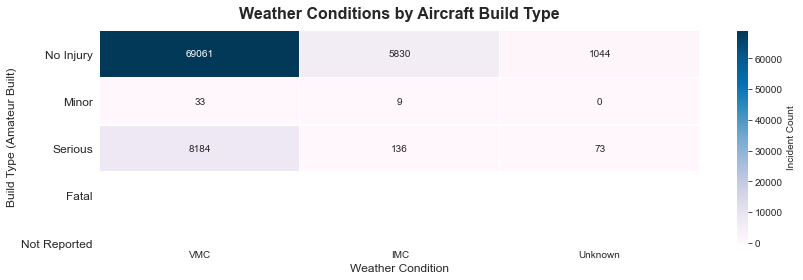

In [313]:
# Create crosstab
heatmap_data = pd.crosstab(aviation_df['amateur_built'], aviation_df['weather_condition'])

# Plot figure
plt.figure(figsize = (12, 4))
sns.heatmap(heatmap_data, annot = True, fmt = 'd', cmap = 'PuBu', linewidths = 0.5, cbar_kws = {'label': 'Incident Count'})

# Add labels 
plt.title('Weather Conditions by Aircraft Build Type', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Weather Condition', fontsize = 12)
plt.ylabel('Build Type (Amateur Built)', fontsize = 12)
plt.yticks(ticks = np.arange(len(injury_order)) + 0.5, labels = injury_order, fontsize = 12, rotation = 0)
plt.tight_layout()

plt.show()

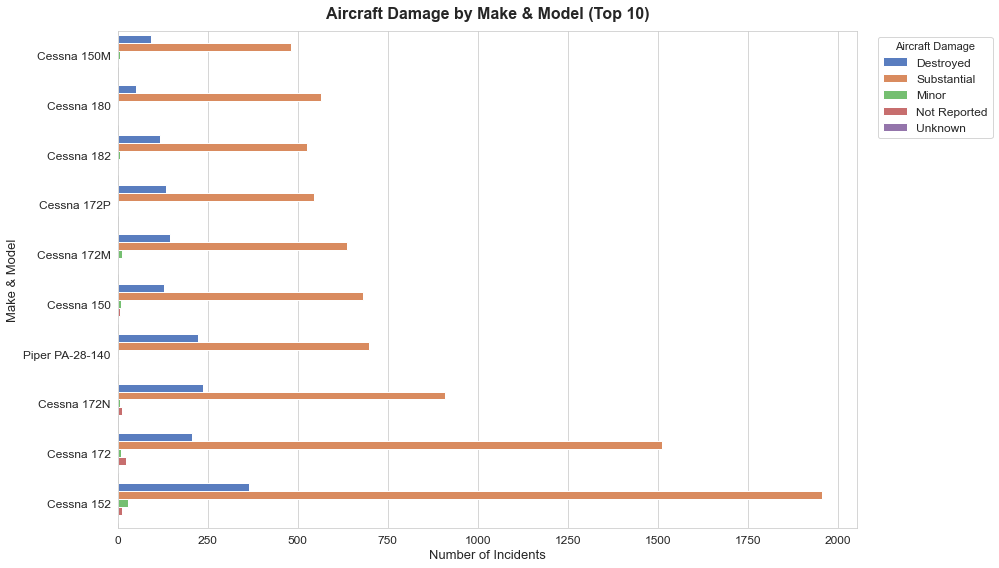

In [314]:
# Get top 10 make_model entries by count
top_make_models = aviation_df['make_model'].value_counts().head(10).index

# Filter data to top models only
filtered_df = aviation_df[aviation_df['make_model'].isin(top_make_models)]

# Order in descending order
model_order = (filtered_df['make_model'].value_counts().loc[top_make_models] .sort_values(ascending = True).index)

# Plot figure
plt.figure(figsize = (14, 8))
sns.set_style("whitegrid")
ax = sns.countplot(data = filtered_df, y = 'make_model', hue = 'aircraft_damage', order = model_order, palette = 'muted')

# Add labels
plt.title('Aircraft Damage by Make & Model (Top 10)', fontsize = 16, weight = 'bold', pad = 12)
plt.xlabel('Number of Incidents', fontsize = 13)
plt.ylabel('Make & Model', fontsize = 13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Aircraft Damage', bbox_to_anchor = (1.02, 1), loc = 'upper left', fontsize = 12, title_fontsize = 11)
plt.tight_layout()

plt.show()

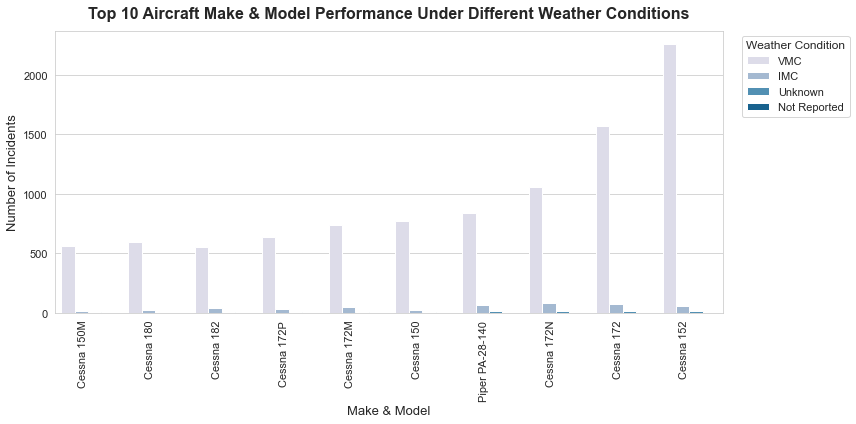

In [315]:
# ==================== [weather_condition Vs. make_model] ====================

# Ensure weather_condition is ordered
weather_order = ['VMC', 'IMC', 'Unknown', 'Not Reported']
aviation_df['weather_condition'] = pd.Categorical(aviation_df['weather_condition'], categories = weather_order, ordered = True)

# Get top 10 make_model entries
top_models = aviation_df['make_model'].value_counts().head(10).index

# Filter data
filtered_df = aviation_df[aviation_df['make_model'].isin(top_models)]

# Sort make_models by total incident count for logical display
mm_order = (filtered_df['make_model'].value_counts().loc[top_models].sort_values(ascending = True) .index)

# Plot figure
plt.figure(figsize = (12, 6))
ax = sns.countplot(data = filtered_df, x ='make_model', hue ='weather_condition', 
    palette = 'PuBu', 
    order = mm_order,
    hue_order = weather_order
)

# Labeling
plt.title('Top 10 Aircraft Make & Model Performance Under Different Weather Conditions',
          fontsize = 16, weight='bold', pad = 12)
plt.xlabel('Make & Model', fontsize = 13)
plt.ylabel('Number of Incidents', fontsize = 13)
plt.xticks(rotation = 90, ha = 'right', fontsize = 11)
plt.yticks(fontsize = 11)
plt.legend(title = 'Weather Condition', bbox_to_anchor=(1.02, 1), loc = 'upper left', fontsize = 11, title_fontsize = 12)
plt.tight_layout()

plt.show()

## MULTIVARIATE ANALYSIS

Well, that was something!

Now it’s time to level up the exploration by examining how multiple variables interact at once. While univariate and bivariate analyses are great for establishing foundations, multivariate analysis opens the door to deeper, more layered insights— the kind that often hide in plain sight.

This phase helps uncover **compound relationships** that can highlight risk patterns, operational blind spots, or contextual drivers behind incidents.

### Key Questions:
- How does the combination of 'engine_configuration' and 'injury_severity' relate to 'aircraft_damage'?
- Are certain aircraft types more prone to incidents under specific 'weather_conditions' or during certain 'flight phases'?
- What combinations of 'flight_purpose', 'injury_severity', and 'engine_type' are most commonly associated with high incident rates?

In [316]:
# Ensure total_fatal_injuries is numeric
aviation_df['total_fatal_injuries'] = pd.to_numeric(aviation_df['total_fatal_injuries'], errors = 'coerce')

# Filter out Not Reported and Unknown engine types
filtered_df = aviation_df[
    ~aviation_df['engine_type_display'].str.contains('Not Reported|Unknown', case = False, na = False)
]

# Group and aggregate
fatalities_grouped = (filtered_df
    .groupby(['mm_clean', 'engine_type_display'])['total_fatal_injuries']
    .sum()
    .reset_index()
    .sort_values(by='total_fatal_injuries', ascending = False)
)

# Plot top 20 combinations
fig = px.bar(fatalities_grouped.head(20),
    x = 'total_fatal_injuries',
    y = 'mm_clean',
    color = 'engine_type_display',
    orientation = 'h',
    title = 'Total Fatal Injuries by Aircraft Make/Model and Engine Type',
    labels = {
        'total_fatal_injuries': 'Fatal Injuries',
        'mm_clean': 'Aircraft Make & Model',
        'engine_type_display': 'Engine Type'
    },
    color_discrete_sequence = px.colors.sequential.Aggrnyl
)

# Styling
fig.update_layout(
    height = 580,
    width = 1000,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Cambria', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Cambria', color = '#003366'),
    xaxis = dict(
        title = 'Total Fatal Injuries',
        title_font = dict(size = 14),
        showgrid = True,
        gridcolor = '#dcdcdc',
        zeroline = False,
        linecolor = 'gray'
    ),
    yaxis = dict(
        title = 'Make & Model',
        title_font = dict(size = 14),
        showgrid = True,
        gridcolor = '#e0e0e0',
        linecolor = 'gray'
    ),
    legend_title_text = 'Engine Type',
    legend = dict(
        bgcolor = 'rgba(255,255,255,0.95)',
        bordercolor = 'lightgrey',
        borderwidth = 1
    )
)

fig.show()

In [317]:
# Ensure total_fatal_injuries is numeric
aviation_df['total_uninjured'] = pd.to_numeric(aviation_df['total_uninjured'], errors = 'coerce')

# Filter out Not Reported and Unknown engine types
filtered_df = aviation_df[
    ~aviation_df['engine_type_display'].str.contains('Not Reported|Unknown', case = False, na = False)
]

# Grouping and aggregation
fatalities_grouped = (filtered_df
    .groupby(['mm_clean', 'engine_type_display'])['total_uninjured']
    .sum()
    .reset_index()
    .sort_values(by='total_uninjured', ascending = False)
)

# Plot top 20 combinations
fig = px.bar(fatalities_grouped.head(20), x = 'total_uninjured', y = 'mm_clean',
    color='engine_type_display',
    orientation='h',
    title='Survivability by Aircraft Make/Model and Engine Type',
    labels={
        'total_uninjured': 'Number of Survivors',
        'mm_clean': 'Aircraft Make & Model',
        'engine_type_display': 'Engine Type'
    },
    color_discrete_sequence = px.colors.sequential.Aggrnyl
)

# Styling
fig.update_layout(
    height = 580,
    width = 1000,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Cambria', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Cambria', color = '#003366'),
    xaxis = dict(
        title = 'Number of Survivors',
        title_font = dict(size = 14),
        showgrid = True,
        gridcolor = '#dcdcdc',
        zeroline = False,
        linecolor = 'gray'
    ),
    yaxis = dict(
        title = 'Make & Model',
        title_font = dict(size=14),
        showgrid = True,
        gridcolor = '#e0e0e0',
        linecolor = 'gray'
    ),
    legend_title_text = 'Engine Type',
    legend = dict(
        bgcolor = 'rgba(255,255,255,0.95)',
        bordercolor = 'lightgrey',
        borderwidth = 1
    )
)

fig.show()

In [318]:
# Ensure total_fatal_injuries is numeric
aviation_df['total_fatal_injuries'] = pd.to_numeric(aviation_df['total_fatal_injuries'], errors = 'coerce')

# Group and aggregate
fatal_damage_grouped = (aviation_df.groupby(['mm_clean', 'aircraft_damage'])['total_fatal_injuries']
    .sum()
    .reset_index()
    .sort_values(by='total_fatal_injuries', ascending=False)
)

# Plot top 20 combinations
fig = px.bar(fatal_damage_grouped.head(20), x = 'total_fatal_injuries', y = 'mm_clean',
    color='aircraft_damage',
    orientation='h',
    title='Total Fatal Injuries by Aircraft Make/Model and Damage Level',
    labels={
        'total_fatal_injuries': 'Fatal Injuries',
        'mm_clean': 'Aircraft Make & Model',
        'aircraft_damage': 'Damage Category'
    },
    color_discrete_sequence = px.colors.sequential.Viridis
)

# Styling
fig.update_layout(
    height = 600,
    width = 1100,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Cambria', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Cambria', color = '#003366'),
    xaxis = dict(
        title = 'Total Fatal Injuries',
        showgrid = True,
        gridcolor = '#dcdcdc',
        zeroline = False,
        linecolor = 'gray',
        title_font = dict(size = 14, family = 'Cambria')
    ),
    yaxis = dict(
        title = 'Aircraft Make & Model',
        showgrid = True,
        gridcolor = '#e0e0e0',
        linecolor = 'gray',
        title_font = dict(size = 14, family = 'Cambria')
    ),
    legend_title = dict(
        text = 'Damage Category',
        font = dict(size=13, family = 'Cambria')
    ),
    legend = dict(
        bgcolor = 'rgba(255,255,255,0.95)',
        bordercolor = 'lightgrey',
        borderwidth = 1
    )
)

fig.show()

In [319]:
# Ensure total_fatal_injuries is numeric
aviation_df['total_fatal_injuries'] = pd.to_numeric(aviation_df['total_fatal_injuries'], errors = 'coerce')

# Filter out Not Reported and Unknown engine counts because they are vague for recommendations
filtered_df = aviation_df[
    ~aviation_df['engine_count_display'].str.contains('Not Reported|Unknown', case = False, na = False)
]

# Group and aggregate fatalities
fatal_by_engine_count = (filtered_df.groupby(['mm_clean', 'engine_count_display'])['total_fatal_injuries']
    .sum()
    .reset_index()
    .sort_values(by = 'total_fatal_injuries', ascending = False)
)

# Plot top 20
fig = px.bar(fatal_by_engine_count.head(20), x = 'total_fatal_injuries', y = 'mm_clean',
    color = 'engine_count_display',
    orientation = 'h',
    title = 'Total Fatal Injuries by Aircraft Make/Model and Engine Count',
    labels = {
        'total_fatal_injuries': 'Fatal Injuries',
        'mm_clean': 'Aircraft Make & Model',
        'engine_count_display': 'Engine Count'
    },
    color_discrete_sequence=px.colors.qualitative.Prism
)

# Styling
fig.update_layout(
    height = 580,
    width = 1200,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Cambria', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Cambria', color = '#003366'),
    xaxis = dict(
        title = 'Total Fatal Injuries',
        showgrid = True,
        gridcolor = '#dcdcdc',
        zeroline = False,
        linecolor = 'gray',
        title_font = dict(size = 14, family = 'Cambria')
    ),
    yaxis = dict(
        title = 'Aircraft Make & Model',
        showgrid = True,
        gridcolor = '#e0e0e0',
        linecolor = 'gray',
        title_font = dict(size = 14, family = 'Cambria')
    ),
    legend_title = dict(
        text = 'Engine Count',
        font = dict(size = 13, family = 'Cambria')
    ),
    legend = dict(
        bgcolor = 'rgba(255,255,255,0.95)',
        bordercolor = 'lightgrey',
        borderwidth = 1
    )
)

fig.show()

In [320]:
# Group and count incidents by engine count, make/model, and damage
damage_by_eng_count = (aviation_df.groupby(['engine_count_display', 'mm_clean', 'aircraft_damage'])
    .size()
    .reset_index(name = 'incident_count')
    .sort_values(by = 'incident_count', ascending = False)
)

# Plot top 20 configurations
fig = px.bar(damage_by_eng_count.head(20), x = 'incident_count', y = 'mm_clean',
    color = 'aircraft_damage',
    orientation = 'h',
    title = 'Aircraft Damage by Engine Count and Make/Model',
    labels = {
        'incident_count': 'Number of Incidents',
        'mm_clean': 'Make & Model',
        'aircraft_damage': 'Damage Level'
    },
    color_discrete_sequence = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
)

# Styling
fig.update_layout(
    height = 580,
    width = 1200,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Cambria', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Cambria', color = '#003366'),
    xaxis = dict(
        title = 'Number of Incidents',
        gridcolor = '#dcdcdc',
        zeroline = False,
        linecolor = 'black',
        ticks = 'outside',
        title_font = dict(size = 14, family = 'Cambria', color = '#1f2a34')
    ),
    yaxis = dict(
        title = 'Make & Model',
        gridcolor = '#e0e0e0',
        showgrid = True,
        linecolor = 'black',
        ticks = 'outside',
        title_font = dict(size = 14, family = 'Cambria', color = '#1f2a34')
    ),
    legend_title = dict(
        text = 'Damage Level',
        font = dict(size = 13, family = 'Cambria', color = '#1f2a34')
    ),
    legend = dict(
        bgcolor = 'rgba(255,255,255,0.95)',
        bordercolor = 'lightgrey',
        borderwidth = 1
    )
)

fig.show()

In [321]:
# Ensure total_uninjured is numeric
aviation_df['total_uninjured'] = pd.to_numeric(aviation_df['total_uninjured'], errors = 'coerce')

# Remove any engine_configuration entries containing 'Not Reported' or 'Unknown'
filtered_df = aviation_df[
    ~aviation_df['engine_configuration'].str.contains('Not Reported|Unknown', case = False, na = False)
]

# Group by mm_clean and engine configuration, then sum uninjured
survivability_by_config = (filtered_df.groupby(['mm_clean', 'engine_configuration'])['total_uninjured']
    .sum()
    .reset_index()
    .sort_values(by = 'total_uninjured', ascending = False)
)

# Plot top 20 combinations
fig = px.bar(survivability_by_config.head(20), x = 'total_uninjured', y = 'mm_clean', 
    color = 'engine_configuration',
    orientation = 'h',
    title = 'Survivability by Make & Model and Engine Configuration',
    labels = {
        'total_uninjured': 'Total Uninjured',
        'mm_clean': 'Aircraft Make & Model',
        'engine_configuration': 'Engine Config'
    },
    color_discrete_sequence = px.colors.sequential.Plasma_r
)

# Styling
fig.update_layout(
    height = 550,
    width = 1200,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Cambria', size = 13, color = '#333333'),
    title_font = dict(size = 20, family = 'Cambria', color = '#003366'),
    xaxis = dict(
        title = 'Total Survivors',
        gridcolor = '#dcdcdc',
        zeroline = False,
        linecolor = 'black',
        ticks = 'outside',
        title_font = dict(size = 14, family = 'Cambria', color = '#1f2a34')
    ),
    yaxis = dict(
        title = 'Make & Model',
        gridcolor = '#e0e0e0',
        showgrid = True,
        linecolor = 'black',
        ticks = 'outside',
        title_font = dict(size = 14, family = 'Cambria', color = '#1f2a34')
    ),
    legend_title = dict(
        text = 'Engine Configuration',
        font = dict(size = 13, family = 'Cambria', color = '#1f2a34')
    ),
    legend = dict(
        bgcolor = 'rgba(255,255,255,0.95)',
        bordercolor = 'lightgrey',
        borderwidth = 1
    )
)

fig.show()

In [322]:
# Ensure total_fatal_injuries is numeric
aviation_df['total_fatal_injuries'] = pd.to_numeric(aviation_df['total_fatal_injuries'], errors = 'coerce')

# Remove any engine_configuration entries containing 'Not Reported' or 'Unknown'
filtered_df = aviation_df[
    ~aviation_df['engine_configuration']
    .str.contains('Not Reported|Unknown', case = False, na = False)
]

# Group by mm_clean and engine configuration, then sum fatalities
fatalities_by_config = (filtered_df.groupby(['mm_clean', 'engine_configuration'])['total_fatal_injuries']
    .sum()
    .reset_index()
    .sort_values(by='total_fatal_injuries', ascending = False)
)

# Plot top 20 combinations
fig = px.bar(fatalities_by_config.head(20), x = 'total_fatal_injuries', y = 'mm_clean',
    color = 'engine_configuration',
    orientation = 'h',
    title = 'Survavibility by Make & Model and Engine Configuration',
    labels = {
        'total_fatal_injuries': 'Fatal Injuries',
        'mm_clean': 'Aircraft Make & Model',
        'engine_configuration': 'Engine Config'
    },
    color_discrete_sequence = px.colors.sequential.Plasma_r
)

# Styling
fig.update_layout(
    height = 550,
    width = 1200,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Cambria', size = 13, color = '#333333'),
    title_font = dict(size = 20, family = 'Cambria', color = '#003366'),
    xaxis = dict(
        title = 'Total Fatal Injuries',
        gridcolor = '#dcdcdc',
        zeroline = False,
        linecolor = 'black',
        ticks = 'outside',
        title_font = dict(size = 14, family = 'Cambria', color = '#1f2a34')
    ),
    yaxis = dict(
        title = 'Make & Model',
        gridcolor = '#e0e0e0',
        showgrid = True,
        linecolor = 'black',
        ticks = 'outside',
        title_font = dict(size = 14, family = 'Cambria', color = '#1f2a34')
    ),
    legend_title = dict(
        text = 'Engine Configuration',
        font = dict(size = 13, family = 'Cambria', color = '#1f2a34')
    ),
    legend = dict(
        bgcolor = 'rgba(255,255,255,0.95)',
        bordercolor = 'lightgrey',
        borderwidth = 1
    )
)

fig.show()

In [323]:
eng_trend = (aviation_df[~aviation_df['engine_type_display'].isin(['Unknown', 'Not Reported'])]
    .groupby([aviation_df['event_date'].dt.year, 'engine_type_display'])
    .size()
    .reset_index(name = 'incident_count')
)

fig = px.line(eng_trend, x = 'event_date', y = 'incident_count',
    color = 'engine_type_display',
    title = 'Engine Type Trends Over Time',
    labels = {'event_date': 'Year', 'incident_count': 'Incidents', 'engine_type_display': 'Engine Type'}
)

fig.update_layout(
    height = 550,
    width = 1000,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Cambria', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Cambria', color = '#003366'),
    xaxis = dict(gridcolor = 'lightgray'),
    yaxis = dict(gridcolor = 'lightgray'),
    legend_title_text = 'Engine Type',
    legend = dict(
        bgcolor = 'rgba(255,255,255,0.95)',
        bordercolor = 'lightgray',
        borderwidth = 1
    )
)
fig.show()

In [324]:
# Sum total fatalities by model across all years
top_models = (aviation_df[aviation_df['mm_clean'].notna()]
    .groupby('mm_clean')['total_fatal_injuries']
    .sum()
    .nlargest(10)
    .index
)

# Filter the dataset to only include top 10 models
filtered_df = aviation_df[aviation_df['mm_clean'].isin(top_models)].copy()

# Group by year and model, then sum fatalities
fatal_mm = (filtered_df.groupby([filtered_df['event_date'].dt.year, 'mm_clean'])['total_fatal_injuries']
    .sum()
    .reset_index()
    .rename(columns = {'event_date': 'Year'})
)

# Plot figure
fig = px.line(fatal_mm, x = 'Year', y = 'total_fatal_injuries',
    color = 'mm_clean',
    title = 'Annual Fatal Injuries for Top 10 Aircraft Make & Models',
    labels = {'total_fatal_injuries': 'Fatal Injuries', 'mm_clean': 'Make & Model'}
)

# Styling
fig.update_layout(
    height = 550,
    width = 1000,
    plot_bgcolor = '#f5f5f5',
    paper_bgcolor = '#f5f5f5',
    font = dict(family = 'Cambria', size = 13, color = '#1f2a34'),
    title_font = dict(size = 20, family = 'Cambria', color = '#003366'),
    xaxis = dict(gridcolor = 'lightgray'),
    yaxis = dict(gridcolor = 'lightgray'),
    legend_title_text = 'Make & Model',
    legend = dict(
        bgcolor = 'rgba(255,255,255,0.95)',
        bordercolor = 'lightgray',
        borderwidth = 1
    )
)

fig.show()

I have charted turbulent skies of engine counts, braved the fog of unknowns, and decoded crash patterns with the grace of a seasoned co-pilot. 

One conclusion: in aviation, every detail matters- except 'Not Reported', that guy’s grounded.

See insights in dashboard and presentation!